<a href="https://colab.research.google.com/github/pascalghanimi/Injury-Prediction-in-Runners/blob/main/CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Zuerst Pakete installieren
!pip uninstall -y numpy
!pip install numpy==1.26.4 --force-reinstall
!pip install catboost --force-reinstall --no-deps
!pip install optuna

# Restart runtime in order to make changes available
import os
os._exit(00)


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 34.4 MB/s eta 0:00:00


In [ ]:
# Data extraction
import numpy as np
import pickle


with open("features.pkl", "rb") as f:
  features = pickle.load(f)

with open("features_days.pkl", "rb") as f:
  features_days = pickle.load(f)

with open("features_weeks.pkl", "rb") as f:
  features_weeks = pickle.load(f)

with open("features_objective.pkl", "rb") as f:
  features_objective = pickle.load(f)

with open("features_subjective.pkl", "rb") as f:
  features_subjective = pickle.load(f)

with open("labels.pkl", "rb") as f:
  labels = pickle.load(f)

print(features[0][0]) # first athlete first row
print(features_days[0][0])
print(features_weeks[0])
print(labels[0])

print(len(features[0][0])) # amount of features

[ 0.77523982  0.48379555 -0.34174298  1.12482238  4.65573275 -0.30257114
 -0.36195376  1.13221076  0.88408664  0.98946749 -1.07576228 -0.58780279
 -0.34515758 -0.21498604 -0.25818757 -0.30257114 -0.36653747 -1.10832632
 -1.12373205 -1.11938273  0.76147321 -0.58880824 -0.33963599 -0.22015974
 -0.26519341  3.1128211  -0.36131219  0.94306135  0.88408664  0.88198911
 -1.08073515 -0.58890474 -0.33382237 -0.21223522 -0.26471133 -0.29617444
 -0.36131219 -1.10795815 -1.12373205 -1.11942205  0.7667035  -0.5913292
 -0.33382237 -0.22367068 -0.26509659 -0.29617444  2.42402301  0.57403001
  0.88989186  0.9965464   0.78053094  2.39956507  5.70866175 -0.21223522
 -0.26519341  3.3763886  -0.35067995  1.13636789  0.88989186  0.88771258
  0.78584128 -0.58219763 -0.3393889  -0.21762941 -0.25818757 -0.28968273
  2.19131074  0.96442407  0.89572629  0.67074481  0.37283858 -0.47040001
 -0.01179093  0.73505066  1.36358038  0.5749299   0.54093582  1.26319022
  2.68987335 -0.05530893  0.11981333  1.16084473  1.

In [ ]:
import numpy as np

X = np.vstack([features[athlete_id] for athlete_id in features])
X_days = np.vstack([features_days[athlete_id] for athlete_id in features_days])
X_weeks = np.vstack([features_weeks[athlete_id] for athlete_id in features_weeks])
X_objective = np.vstack([features_objective[athlete_id] for athlete_id in features_objective])
X_subjective = np.vstack([features_subjective[athlete_id] for athlete_id in features_subjective])

Y = np.hstack([labels[athlete_id] for athlete_id in labels])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train_days, X_temp_days, Y_train_days, Y_temp_days = train_test_split(X_days, Y, test_size=0.3, random_state=42)
X_val_days, X_test_days, Y_val_days, Y_test_days = train_test_split(X_temp_days, Y_temp_days, test_size=0.5, random_state=42)

X_train_weeks, X_temp_weeks, Y_train_weeks, Y_temp_weeks = train_test_split(X_weeks, Y, test_size=0.3, random_state=42)
X_val_weeks, X_test_weeks, Y_val_weeks, Y_test_weeks = train_test_split(X_temp_weeks, Y_temp_weeks, test_size=0.5, random_state=42)

X_train_subjective, X_temp_subjective, Y_train_subjective, Y_temp_subjective = train_test_split(X_subjective, Y, test_size=0.3, random_state=42)
X_val_subjective, X_test_subjective, Y_val_subjective, Y_test_subjective = train_test_split(X_temp_subjective, Y_temp_subjective, test_size=0.5, random_state=42)

X_train_objective, X_temp_objective, Y_train_objective, Y_temp_objective = train_test_split(X_objective, Y, test_size=0.3, random_state=42)
X_val_objective, X_test_objective, Y_val_objective, Y_test_objective = train_test_split(X_temp_objective, Y_temp_objective, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(X_train_days.shape, X_val_days.shape, X_test_days.shape)
print(X_train_weeks.shape, X_val_weeks.shape, X_test_weeks.shape)
print(X_train_subjective.shape, X_val_subjective.shape, X_test_subjective.shape)
print(X_train_objective.shape, X_val_objective.shape, X_test_objective.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(29876, 139) (6402, 139) (6402, 139)
(29876, 70) (6402, 70) (6402, 70)
(29876, 69) (6402, 69) (6402, 69)
(29876, 48) (6402, 48) (6402, 48)
(29876, 91) (6402, 91) (6402, 91)
(29876,) (6402,) (6402,)


In [ ]:
def get_training_batch(X_train, Y_train, batch_size):
    injured_indices = np.where(Y_train == 1)[0]
    uninjured_indices = np.where(Y_train == 0)[0]

    injured_sample = np.random.choice(injured_indices, size=batch_size // 2, replace=True)
    uninjured_sample = np.random.choice(uninjured_indices, size=batch_size // 2, replace=True)

    selected_indices = np.concatenate([injured_sample, uninjured_sample])
    np.random.shuffle(selected_indices)

    X_batch = X_train[selected_indices]
    Y_batch = Y_train[selected_indices]

    return X_batch, Y_batch

In [ ]:
print(f"Percentage of injuries in the test set: {np.mean(Y_test):.4f}")

n_injuries = np.sum(Y_test == 1)
n_healthy = np.sum(Y_test == 0)
n_total = len(Y_test)

print(f"Total Test Samples: {n_total}")
print(f"Injuries (positive): {n_injuries}")
print(f"No injuries (negative): {n_healthy}")

Anteil Verletzungen im Testset: 0.0162
Total Test Samples: 6402
Verletzungen (positiv): 104
Keine Verletzung (negativ): 6298


In [ ]:
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
import warnings

warnings.filterwarnings("ignore")

def tune_params(X_train, Y_train, X_val, Y_val):
    def catboost_objective(trial):
        params = {
            'loss_function': 'Logloss',
            'verbose': False,
            'auto_class_weights': 'Balanced',
            #'task_type': "GPU",
            'bootstrap_type': 'Bernoulli',
            'border_count': 64,
            'gpu_ram_part': 0.98,
            'has_time': False,
            'allow_writing_files': False,
            'iterations': trial.suggest_int('iterations', 1000, 2000),
            'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.3, log=True),
            'depth': trial.suggest_int('depth', 6, 9),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 5.0),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 50, 150),
            'early_stopping_rounds': 30
        }

        X_batch, Y_batch = get_training_batch(X_train, Y_train, 4096)
        train_pool = Pool(X_batch, Y_batch)
        val_pool = Pool(X_val, Y_val)

        model = CatBoostClassifier(**params)
        model.fit(train_pool, eval_set=val_pool, use_best_model=True, verbose=0)

        # Trial Result
        auc = roc_auc_score(Y_val, model.predict_proba(X_val)[:, 1])
        print(f"Trial {trial.number+1}/50 | AUC: {auc:.4f} | Beste Iteration: {model.best_iteration_}")

        return auc

    # Optuna
    print("\nStarting Hyperparameter-Tuning...")
    study = optuna.create_study(
        direction='maximize',
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
    )
    study.optimize(catboost_objective, n_trials=50, show_progress_bar=False)

    # Final Report
    print("\n🔧 Best Parameters:")
    print(study.best_params)
    print(f"🏆 Best AUC: {study.best_value:.4f}")

    return study.best_params

In [ ]:
tuned_params = tune_params(X_train, Y_train, X_val, Y_val)
tuned_params_days = tune_params(X_train_days, Y_train_days, X_val_days, Y_val_days)
tuned_params_weeks = tune_params(X_train_weeks, Y_train_weeks, X_val_weeks, Y_val_weeks)
tuned_params_objective = tune_params(X_train_objective, Y_train_objective, X_val_objective, Y_val_objective)
tuned_params_subjective = tune_params(X_train_subjective, Y_train_subjective, X_val_subjective, Y_val_subjective)

[I 2025-03-26 21:44:57,778] A new study created in memory with name: no-name-91a688d1-5ef1-4eaf-965b-bfedd4d41cae



Starte Hyperparameter-Tuning...


[I 2025-03-26 21:45:02,743] Trial 0 finished with value: 0.6862340112616967 and parameters: {'iterations': 1249, 'learning_rate': 0.21335729689851607, 'depth': 6, 'l2_leaf_reg': 0.9991341036145944, 'subsample': 0.8945402650861297, 'min_data_in_leaf': 104}. Best is trial 0 with value: 0.6862340112616967.


Trial 1/50 | AUC: 0.6862 | Beste Iteration: 805


[I 2025-03-26 21:45:15,734] Trial 1 finished with value: 0.7158902033394465 and parameters: {'iterations': 1691, 'learning_rate': 0.04308950926700415, 'depth': 8, 'l2_leaf_reg': 4.373808243339062, 'subsample': 0.8199744748431531, 'min_data_in_leaf': 70}. Best is trial 1 with value: 0.7158902033394465.


Trial 2/50 | AUC: 0.7159 | Beste Iteration: 1662


[I 2025-03-26 21:45:24,741] Trial 2 finished with value: 0.7484995146493854 and parameters: {'iterations': 1700, 'learning_rate': 0.0465020007715162, 'depth': 8, 'l2_leaf_reg': 1.6346723517814294, 'subsample': 0.8145073449447746, 'min_data_in_leaf': 82}. Best is trial 2 with value: 0.7484995146493854.


Trial 3/50 | AUC: 0.7485 | Beste Iteration: 1120


[I 2025-03-26 21:45:30,307] Trial 3 finished with value: 0.7123570071152205 and parameters: {'iterations': 1217, 'learning_rate': 0.06420986875098161, 'depth': 6, 'l2_leaf_reg': 0.14255778088875595, 'subsample': 0.8510713622337871, 'min_data_in_leaf': 52}. Best is trial 2 with value: 0.7484995146493854.


Trial 4/50 | AUC: 0.7124 | Beste Iteration: 875


[I 2025-03-26 21:45:36,892] Trial 4 finished with value: 0.715741766129363 and parameters: {'iterations': 1588, 'learning_rate': 0.1029068363951274, 'depth': 7, 'l2_leaf_reg': 4.400155074109019, 'subsample': 0.7456813358954248, 'min_data_in_leaf': 105}. Best is trial 2 with value: 0.7484995146493854.


Trial 5/50 | AUC: 0.7157 | Beste Iteration: 937


[I 2025-03-26 21:45:43,283] Trial 5 finished with value: 0.6824781592223453 and parameters: {'iterations': 1441, 'learning_rate': 0.19045336286902106, 'depth': 8, 'l2_leaf_reg': 2.7239794494441707, 'subsample': 0.8408159224348494, 'min_data_in_leaf': 137}. Best is trial 2 with value: 0.7484995146493854.


Trial 6/50 | AUC: 0.6825 | Beste Iteration: 779


[I 2025-03-26 21:45:47,140] Trial 6 finished with value: 0.6883043197181254 and parameters: {'iterations': 1342, 'learning_rate': 0.22100110922346225, 'depth': 6, 'l2_leaf_reg': 3.201701778755877, 'subsample': 0.7563670246303189, 'min_data_in_leaf': 146}. Best is trial 2 with value: 0.7484995146493854.


Trial 7/50 | AUC: 0.6883 | Beste Iteration: 582


[I 2025-03-26 21:45:49,502] Trial 7 finished with value: 0.7424448389749239 and parameters: {'iterations': 1996, 'learning_rate': 0.27359577955372716, 'depth': 6, 'l2_leaf_reg': 0.9511087828814581, 'subsample': 0.8981802287028391, 'min_data_in_leaf': 81}. Best is trial 2 with value: 0.7484995146493854.


Trial 8/50 | AUC: 0.7424 | Beste Iteration: 290


[I 2025-03-26 21:45:55,726] Trial 8 finished with value: 0.7010035136650125 and parameters: {'iterations': 1031, 'learning_rate': 0.09840148578268176, 'depth': 9, 'l2_leaf_reg': 1.6879445896225065, 'subsample': 0.8103159999264997, 'min_data_in_leaf': 147}. Best is trial 2 with value: 0.7484995146493854.


Trial 9/50 | AUC: 0.7010 | Beste Iteration: 588


[I 2025-03-26 21:46:00,136] Trial 9 finished with value: 0.70530233339388 and parameters: {'iterations': 1539, 'learning_rate': 0.1927021296848146, 'depth': 9, 'l2_leaf_reg': 2.227370662385344, 'subsample': 0.7622068660035209, 'min_data_in_leaf': 81}. Best is trial 2 with value: 0.7484995146493854.


Trial 10/50 | AUC: 0.7053 | Beste Iteration: 389


[I 2025-03-26 21:46:12,220] Trial 10 finished with value: 0.7069859238556174 and parameters: {'iterations': 1794, 'learning_rate': 0.03609329200226947, 'depth': 7, 'l2_leaf_reg': 3.488312480593791, 'subsample': 0.9630705804415637, 'min_data_in_leaf': 121}. Best is trial 2 with value: 0.7484995146493854.


Trial 11/50 | AUC: 0.7070 | Beste Iteration: 1791


[I 2025-03-26 21:46:20,507] Trial 11 finished with value: 0.714753486809596 and parameters: {'iterations': 1904, 'learning_rate': 0.06689006830576279, 'depth': 8, 'l2_leaf_reg': 1.0421384231214341, 'subsample': 0.9277644173759553, 'min_data_in_leaf': 81}. Best is trial 2 with value: 0.7484995146493854.


Trial 12/50 | AUC: 0.7148 | Beste Iteration: 1031


[I 2025-03-26 21:46:24,158] Trial 12 finished with value: 0.6836695631453845 and parameters: {'iterations': 1988, 'learning_rate': 0.14127235296357182, 'depth': 7, 'l2_leaf_reg': 0.4716019449332438, 'subsample': 0.7011472216783772, 'min_data_in_leaf': 87}. Best is trial 2 with value: 0.7484995146493854.


Trial 13/50 | AUC: 0.6837 | Beste Iteration: 461


[I 2025-03-26 21:46:31,164] Trial 13 finished with value: 0.696890240448749 and parameters: {'iterations': 1791, 'learning_rate': 0.06657802794486287, 'depth': 8, 'l2_leaf_reg': 1.8269352686709615, 'subsample': 0.8901777521389165, 'min_data_in_leaf': 60}. Best is trial 2 with value: 0.7484995146493854.


Trial 14/50 | AUC: 0.6969 | Beste Iteration: 845


[I 2025-03-26 21:46:33,309] Trial 14 finished with value: 0.670179355118447 and parameters: {'iterations': 1862, 'learning_rate': 0.2908877931770665, 'depth': 7, 'l2_leaf_reg': 1.1196719072618042, 'subsample': 0.99746590250232, 'min_data_in_leaf': 93}. Best is trial 2 with value: 0.7484995146493854.


Trial 15/50 | AUC: 0.6702 | Beste Iteration: 207


[I 2025-03-26 21:46:42,980] Trial 15 finished with value: 0.7239722188042601 and parameters: {'iterations': 2000, 'learning_rate': 0.048915721649331945, 'depth': 9, 'l2_leaf_reg': 1.5010498479200778, 'subsample': 0.9059677273377575, 'min_data_in_leaf': 70}. Best is trial 2 with value: 0.7484995146493854.


Trial 16/50 | AUC: 0.7240 | Beste Iteration: 966


[I 2025-03-26 21:46:52,735] Trial 16 finished with value: 0.7210190995720711 and parameters: {'iterations': 1657, 'learning_rate': 0.030108286941676998, 'depth': 6, 'l2_leaf_reg': 2.6345146240299533, 'subsample': 0.8645820688291473, 'min_data_in_leaf': 113}. Best is trial 2 with value: 0.7484995146493854.


Trial 17/50 | AUC: 0.7210 | Beste Iteration: 1656


[I 2025-03-26 21:46:57,576] Trial 17 finished with value: 0.6987945336044266 and parameters: {'iterations': 1788, 'learning_rate': 0.1247334919128559, 'depth': 7, 'l2_leaf_reg': 0.6641029486051415, 'subsample': 0.7882666163525428, 'min_data_in_leaf': 70}. Best is trial 2 with value: 0.7484995146493854.


Trial 18/50 | AUC: 0.6988 | Beste Iteration: 659


[I 2025-03-26 21:47:05,389] Trial 18 finished with value: 0.7188765256317858 and parameters: {'iterations': 1687, 'learning_rate': 0.07764076980067251, 'depth': 8, 'l2_leaf_reg': 2.180414920725791, 'subsample': 0.9440671057735768, 'min_data_in_leaf': 94}. Best is trial 2 with value: 0.7484995146493854.


Trial 19/50 | AUC: 0.7189 | Beste Iteration: 964


[I 2025-03-26 21:47:16,679] Trial 19 finished with value: 0.7394096886529518 and parameters: {'iterations': 1456, 'learning_rate': 0.04846293217945066, 'depth': 9, 'l2_leaf_reg': 1.3138535869547279, 'subsample': 0.8589202148885439, 'min_data_in_leaf': 121}. Best is trial 2 with value: 0.7484995146493854.


Trial 20/50 | AUC: 0.7394 | Beste Iteration: 1166


[I 2025-03-26 21:47:20,511] Trial 20 finished with value: 0.6977418012855444 and parameters: {'iterations': 1894, 'learning_rate': 0.14663280731191755, 'depth': 6, 'l2_leaf_reg': 0.6022818124337574, 'subsample': 0.7997281329623177, 'min_data_in_leaf': 78}. Best is trial 2 with value: 0.7484995146493854.


Trial 21/50 | AUC: 0.6977 | Beste Iteration: 574


[I 2025-03-26 21:47:30,744] Trial 21 finished with value: 0.7111187282837338 and parameters: {'iterations': 1431, 'learning_rate': 0.05021581610228421, 'depth': 9, 'l2_leaf_reg': 1.4009592023791406, 'subsample': 0.8724916294567858, 'min_data_in_leaf': 127}. Best is trial 2 with value: 0.7484995146493854.


Trial 22/50 | AUC: 0.7111 | Beste Iteration: 1056


[I 2025-03-26 21:47:44,312] Trial 22 finished with value: 0.7187827758148909 and parameters: {'iterations': 1474, 'learning_rate': 0.036239543730414374, 'depth': 9, 'l2_leaf_reg': 2.0535747243272553, 'subsample': 0.8294519200148845, 'min_data_in_leaf': 114}. Best is trial 2 with value: 0.7484995146493854.


Trial 23/50 | AUC: 0.7188 | Beste Iteration: 1467


[I 2025-03-26 21:47:52,574] Trial 23 finished with value: 0.7065718621643318 and parameters: {'iterations': 1339, 'learning_rate': 0.05117594705716257, 'depth': 8, 'l2_leaf_reg': 1.23984059531767, 'subsample': 0.8700216885705451, 'min_data_in_leaf': 94}. Best is trial 2 with value: 0.7484995146493854.


Trial 24/50 | AUC: 0.7066 | Beste Iteration: 1046


[I 2025-03-26 21:47:56,691] Trial 24 finished with value: 0.7034488213890207 and parameters: {'iterations': 1609, 'learning_rate': 0.0752872916370464, 'depth': 9, 'l2_leaf_reg': 0.17568658717643704, 'subsample': 0.9287415762144757, 'min_data_in_leaf': 130}. Best is trial 2 with value: 0.7484995146493854.


Trial 25/50 | AUC: 0.7034 | Beste Iteration: 364


[I 2025-03-26 21:47:58,902] Trial 25 finished with value: 0.664720381405505 and parameters: {'iterations': 1091, 'learning_rate': 0.2779443019896879, 'depth': 8, 'l2_leaf_reg': 0.7386458595077988, 'subsample': 0.786664226883113, 'min_data_in_leaf': 113}. Best is trial 2 with value: 0.7484995146493854.


Trial 26/50 | AUC: 0.6647 | Beste Iteration: 190


[I 2025-03-26 21:48:06,911] Trial 26 finished with value: 0.7206909752129391 and parameters: {'iterations': 1737, 'learning_rate': 0.057291846931712125, 'depth': 7, 'l2_leaf_reg': 1.7508992520783477, 'subsample': 0.8452182400395795, 'min_data_in_leaf': 61}. Best is trial 2 with value: 0.7484995146493854.


Trial 27/50 | AUC: 0.7207 | Beste Iteration: 1187


[I 2025-03-26 21:48:21,169] Trial 27 finished with value: 0.7240776873482668 and parameters: {'iterations': 1531, 'learning_rate': 0.03802455844405769, 'depth': 9, 'l2_leaf_reg': 4.828300063470127, 'subsample': 0.9073603304821883, 'min_data_in_leaf': 100}. Best is trial 2 with value: 0.7484995146493854.


Trial 28/50 | AUC: 0.7241 | Beste Iteration: 1529


[I 2025-03-26 21:48:31,799] Trial 28 finished with value: 0.728001507809555 and parameters: {'iterations': 1379, 'learning_rate': 0.030611941093408458, 'depth': 8, 'l2_leaf_reg': 2.3935061483539086, 'subsample': 0.8851580563112553, 'min_data_in_leaf': 87}. Best is trial 2 with value: 0.7484995146493854.


Trial 29/50 | AUC: 0.7280 | Beste Iteration: 1378


[I 2025-03-26 21:48:36,960] Trial 29 finished with value: 0.7110034941338004 and parameters: {'iterations': 1203, 'learning_rate': 0.08552168294941984, 'depth': 6, 'l2_leaf_reg': 1.0004626818287718, 'subsample': 0.9613772836713487, 'min_data_in_leaf': 104}. Best is trial 2 with value: 0.7484995146493854.


Trial 30/50 | AUC: 0.7110 | Beste Iteration: 805


[I 2025-03-26 21:48:45,429] Trial 30 finished with value: 0.6908785334403643 and parameters: {'iterations': 1582, 'learning_rate': 0.1210282282114781, 'depth': 9, 'l2_leaf_reg': 2.9725869936832163, 'subsample': 0.718289348548897, 'min_data_in_leaf': 77}. Best is trial 2 with value: 0.7484995146493854.


Trial 31/50 | AUC: 0.6909 | Beste Iteration: 898


[I 2025-03-26 21:48:55,399] Trial 31 finished with value: 0.7126538815353876 and parameters: {'iterations': 1293, 'learning_rate': 0.03069032858043823, 'depth': 8, 'l2_leaf_reg': 2.421542946482301, 'subsample': 0.8905944987173602, 'min_data_in_leaf': 89}. Best is trial 2 with value: 0.7484995146493854.


Trial 32/50 | AUC: 0.7127 | Beste Iteration: 1292


[I 2025-03-26 21:49:05,603] Trial 32 finished with value: 0.7132905990417988 and parameters: {'iterations': 1390, 'learning_rate': 0.04243115400290421, 'depth': 8, 'l2_leaf_reg': 1.9022802576166193, 'subsample': 0.8258207498749451, 'min_data_in_leaf': 74}. Best is trial 2 with value: 0.7484995146493854.


Trial 33/50 | AUC: 0.7133 | Beste Iteration: 1308


[I 2025-03-26 21:49:14,686] Trial 33 finished with value: 0.7090054511612282 and parameters: {'iterations': 1182, 'learning_rate': 0.04183942394698065, 'depth': 8, 'l2_leaf_reg': 1.4839234527245555, 'subsample': 0.8601891025375543, 'min_data_in_leaf': 88}. Best is trial 2 with value: 0.7484995146493854.


Trial 34/50 | AUC: 0.7090 | Beste Iteration: 1179


[I 2025-03-26 21:49:23,077] Trial 34 finished with value: 0.7194448838967111 and parameters: {'iterations': 1282, 'learning_rate': 0.05748919152123011, 'depth': 7, 'l2_leaf_reg': 3.600698492856763, 'subsample': 0.8835468485747167, 'min_data_in_leaf': 60}. Best is trial 2 with value: 0.7484995146493854.


Trial 35/50 | AUC: 0.7194 | Beste Iteration: 1281


[I 2025-03-26 21:49:34,157] Trial 35 finished with value: 0.7055308485725614 and parameters: {'iterations': 1472, 'learning_rate': 0.03460619303781359, 'depth': 8, 'l2_leaf_reg': 1.2988692134499074, 'subsample': 0.9076168464600477, 'min_data_in_leaf': 99}. Best is trial 2 with value: 0.7484995146493854.


Trial 36/50 | AUC: 0.7055 | Beste Iteration: 1470


[I 2025-03-26 21:49:43,277] Trial 36 finished with value: 0.7098667776039499 and parameters: {'iterations': 1385, 'learning_rate': 0.04603767759301732, 'depth': 7, 'l2_leaf_reg': 2.4811011294040726, 'subsample': 0.8431746272420857, 'min_data_in_leaf': 85}. Best is trial 2 with value: 0.7484995146493854.


Trial 37/50 | AUC: 0.7099 | Beste Iteration: 1384


[I 2025-03-26 21:49:52,569] Trial 37 finished with value: 0.7195562118042738 and parameters: {'iterations': 1656, 'learning_rate': 0.05823752050289743, 'depth': 6, 'l2_leaf_reg': 0.868760794150889, 'subsample': 0.8124974699661744, 'min_data_in_leaf': 107}. Best is trial 2 with value: 0.7484995146493854.


Trial 38/50 | AUC: 0.7196 | Beste Iteration: 1650


[I 2025-03-26 21:49:55,116] Trial 38 finished with value: 0.6387243384290264 and parameters: {'iterations': 1936, 'learning_rate': 0.25001474472855795, 'depth': 9, 'l2_leaf_reg': 0.3021632659026461, 'subsample': 0.9273907950387926, 'min_data_in_leaf': 142}. Best is trial 2 with value: 0.7484995146493854.


Trial 39/50 | AUC: 0.6387 | Beste Iteration: 191


[I 2025-03-26 21:49:57,937] Trial 39 finished with value: 0.6831871422126129 and parameters: {'iterations': 1132, 'learning_rate': 0.17989847873916584, 'depth': 8, 'l2_leaf_reg': 1.579175207709754, 'subsample': 0.7728674129052613, 'min_data_in_leaf': 51}. Best is trial 2 with value: 0.7484995146493854.


Trial 40/50 | AUC: 0.6832 | Beste Iteration: 277


[I 2025-03-26 21:50:04,094] Trial 40 finished with value: 0.700503514641573 and parameters: {'iterations': 1528, 'learning_rate': 0.09328392763540802, 'depth': 7, 'l2_leaf_reg': 2.811974250560856, 'subsample': 0.8344249424015294, 'min_data_in_leaf': 66}. Best is trial 2 with value: 0.7484995146493854.


Trial 41/50 | AUC: 0.7005 | Beste Iteration: 877


[I 2025-03-26 21:50:18,247] Trial 41 finished with value: 0.7277729926308737 and parameters: {'iterations': 1512, 'learning_rate': 0.039048898071911066, 'depth': 9, 'l2_leaf_reg': 4.592089314482984, 'subsample': 0.9028810456736263, 'min_data_in_leaf': 84}. Best is trial 2 with value: 0.7484995146493854.


Trial 42/50 | AUC: 0.7278 | Beste Iteration: 1511


[I 2025-03-26 21:50:31,512] Trial 42 finished with value: 0.7206441003044917 and parameters: {'iterations': 1403, 'learning_rate': 0.03222855310884362, 'depth': 9, 'l2_leaf_reg': 3.882904931904541, 'subsample': 0.8524304515135819, 'min_data_in_leaf': 83}. Best is trial 2 with value: 0.7484995146493854.


Trial 43/50 | AUC: 0.7206 | Beste Iteration: 1402


[I 2025-03-26 21:50:46,364] Trial 43 finished with value: 0.7314624385499247 and parameters: {'iterations': 1600, 'learning_rate': 0.03961602727670312, 'depth': 9, 'l2_leaf_reg': 4.321707753679968, 'subsample': 0.8784211503863357, 'min_data_in_leaf': 91}. Best is trial 2 with value: 0.7484995146493854.


Trial 44/50 | AUC: 0.7315 | Beste Iteration: 1594


[I 2025-03-26 21:51:00,655] Trial 44 finished with value: 0.7269487754906729 and parameters: {'iterations': 1746, 'learning_rate': 0.044862419673265354, 'depth': 9, 'l2_leaf_reg': 3.9008152111168415, 'subsample': 0.8796347487609086, 'min_data_in_leaf': 92}. Best is trial 2 with value: 0.7484995146493854.


Trial 45/50 | AUC: 0.7269 | Beste Iteration: 1498


[I 2025-03-26 21:51:13,060] Trial 45 finished with value: 0.7095406063660031 and parameters: {'iterations': 1627, 'learning_rate': 0.03407171519113348, 'depth': 8, 'l2_leaf_reg': 3.1097956734515573, 'subsample': 0.8511388335382596, 'min_data_in_leaf': 99}. Best is trial 2 with value: 0.7484995146493854.


Trial 46/50 | AUC: 0.7095 | Beste Iteration: 1624


[I 2025-03-26 21:51:27,607] Trial 46 finished with value: 0.6998609377716057 and parameters: {'iterations': 1579, 'learning_rate': 0.04061774016086803, 'depth': 9, 'l2_leaf_reg': 2.3080104753197985, 'subsample': 0.9158637287275397, 'min_data_in_leaf': 74}. Best is trial 2 with value: 0.7484995146493854.


Trial 47/50 | AUC: 0.6999 | Beste Iteration: 1576


[I 2025-03-26 21:51:37,705] Trial 47 finished with value: 0.6941129021232382 and parameters: {'iterations': 1348, 'learning_rate': 0.052509497253961965, 'depth': 8, 'l2_leaf_reg': 1.985531483618601, 'subsample': 0.8115152316377382, 'min_data_in_leaf': 123}. Best is trial 2 with value: 0.7484995146493854.


Trial 48/50 | AUC: 0.6941 | Beste Iteration: 1347


[I 2025-03-26 21:51:44,684] Trial 48 finished with value: 0.6949703223235892 and parameters: {'iterations': 1844, 'learning_rate': 0.07059715610473752, 'depth': 9, 'l2_leaf_reg': 1.1586847340216355, 'subsample': 0.8933270264824726, 'min_data_in_leaf': 109}. Best is trial 2 with value: 0.7484995146493854.


Trial 49/50 | AUC: 0.6950 | Beste Iteration: 687


[I 2025-03-26 21:51:48,273] Trial 49 finished with value: 0.6937320434921026 and parameters: {'iterations': 1450, 'learning_rate': 0.16458484566462464, 'depth': 6, 'l2_leaf_reg': 3.420782637159591, 'subsample': 0.8633287555700234, 'min_data_in_leaf': 90}. Best is trial 2 with value: 0.7484995146493854.
[I 2025-03-26 21:51:48,274] A new study created in memory with name: no-name-e070003d-f384-429a-9826-a4b530697e37


Trial 50/50 | AUC: 0.6937 | Beste Iteration: 527

🔧 Beste Parameter:
{'iterations': 1700, 'learning_rate': 0.0465020007715162, 'depth': 8, 'l2_leaf_reg': 1.6346723517814294, 'subsample': 0.8145073449447746, 'min_data_in_leaf': 82}
🏆 Beste AUC: 0.7485

Starte Hyperparameter-Tuning...


[I 2025-03-26 21:51:50,776] Trial 0 finished with value: 0.6710113847433892 and parameters: {'iterations': 1184, 'learning_rate': 0.13590417360568904, 'depth': 7, 'l2_leaf_reg': 0.9508976548217818, 'subsample': 0.8642445209649643, 'min_data_in_leaf': 66}. Best is trial 0 with value: 0.6710113847433892.


Trial 1/50 | AUC: 0.6710 | Beste Iteration: 488


[I 2025-03-26 21:51:58,286] Trial 1 finished with value: 0.6716422428862443 and parameters: {'iterations': 1437, 'learning_rate': 0.0339599087005517, 'depth': 8, 'l2_leaf_reg': 4.1529000464549375, 'subsample': 0.9701907166344056, 'min_data_in_leaf': 75}. Best is trial 1 with value: 0.6716422428862443.


Trial 2/50 | AUC: 0.6716 | Beste Iteration: 1436


[I 2025-03-26 21:52:02,161] Trial 2 finished with value: 0.6847926078269378 and parameters: {'iterations': 1163, 'learning_rate': 0.15923615050523468, 'depth': 9, 'l2_leaf_reg': 3.450763797420463, 'subsample': 0.7999738264964416, 'min_data_in_leaf': 70}. Best is trial 2 with value: 0.6847926078269378.


Trial 3/50 | AUC: 0.6848 | Beste Iteration: 584


[I 2025-03-26 21:52:04,319] Trial 3 finished with value: 0.6939546993072281 and parameters: {'iterations': 1165, 'learning_rate': 0.27764639558793275, 'depth': 6, 'l2_leaf_reg': 4.887788603029756, 'subsample': 0.8364688764521312, 'min_data_in_leaf': 119}. Best is trial 3 with value: 0.6939546993072281.


Trial 4/50 | AUC: 0.6940 | Beste Iteration: 479


[I 2025-03-26 21:52:06,297] Trial 4 finished with value: 0.6998511721656793 and parameters: {'iterations': 1040, 'learning_rate': 0.24202766548951374, 'depth': 8, 'l2_leaf_reg': 4.817258831922789, 'subsample': 0.7915659984378131, 'min_data_in_leaf': 119}. Best is trial 4 with value: 0.6998511721656793.


Trial 5/50 | AUC: 0.6999 | Beste Iteration: 313


[I 2025-03-26 21:52:08,068] Trial 5 finished with value: 0.6589664863935814 and parameters: {'iterations': 1936, 'learning_rate': 0.16718476371737445, 'depth': 8, 'l2_leaf_reg': 0.9049069293157674, 'subsample': 0.7399507276465829, 'min_data_in_leaf': 135}. Best is trial 4 with value: 0.6998511721656793.


Trial 6/50 | AUC: 0.6590 | Beste Iteration: 267


[I 2025-03-26 21:52:13,535] Trial 6 finished with value: 0.6569684434210089 and parameters: {'iterations': 1650, 'learning_rate': 0.08349564409605237, 'depth': 9, 'l2_leaf_reg': 2.479540294350672, 'subsample': 0.8349605217294239, 'min_data_in_leaf': 123}. Best is trial 4 with value: 0.6998511721656793.


Trial 7/50 | AUC: 0.6570 | Beste Iteration: 866


[I 2025-03-26 21:52:20,399] Trial 7 finished with value: 0.6978355511024392 and parameters: {'iterations': 1957, 'learning_rate': 0.07383753825061179, 'depth': 8, 'l2_leaf_reg': 2.064752994064695, 'subsample': 0.8445346689292305, 'min_data_in_leaf': 73}. Best is trial 4 with value: 0.6998511721656793.


Trial 8/50 | AUC: 0.6978 | Beste Iteration: 1378


[I 2025-03-26 21:52:23,400] Trial 8 finished with value: 0.6850914353682903 and parameters: {'iterations': 1588, 'learning_rate': 0.140815388504991, 'depth': 8, 'l2_leaf_reg': 2.438011356553354, 'subsample': 0.7719528769980585, 'min_data_in_leaf': 92}. Best is trial 4 with value: 0.6998511721656793.


Trial 9/50 | AUC: 0.6851 | Beste Iteration: 542


[I 2025-03-26 21:52:26,360] Trial 9 finished with value: 0.6684352178999651 and parameters: {'iterations': 1977, 'learning_rate': 0.10360488969982701, 'depth': 6, 'l2_leaf_reg': 0.16601987586404335, 'subsample': 0.9039215125866943, 'min_data_in_leaf': 131}. Best is trial 4 with value: 0.6998511721656793.


Trial 10/50 | AUC: 0.6684 | Beste Iteration: 680


[I 2025-03-26 21:52:29,680] Trial 10 finished with value: 0.678812150757518 and parameters: {'iterations': 1012, 'learning_rate': 0.2317698625740784, 'depth': 7, 'l2_leaf_reg': 3.5532753531766215, 'subsample': 0.7086442018554606, 'min_data_in_leaf': 150}. Best is trial 4 with value: 0.6998511721656793.


Trial 11/50 | AUC: 0.6788 | Beste Iteration: 742


[I 2025-03-26 21:52:35,351] Trial 11 finished with value: 0.6990152362983666 and parameters: {'iterations': 1740, 'learning_rate': 0.05058752311019162, 'depth': 8, 'l2_leaf_reg': 1.7881784823955893, 'subsample': 0.9144081164052187, 'min_data_in_leaf': 98}. Best is trial 4 with value: 0.6998511721656793.


Trial 12/50 | AUC: 0.6990 | Beste Iteration: 1077


[I 2025-03-26 21:52:41,095] Trial 12 finished with value: 0.6896773639113987 and parameters: {'iterations': 1741, 'learning_rate': 0.04939771906111916, 'depth': 9, 'l2_leaf_reg': 1.4585446850595347, 'subsample': 0.9289684742532575, 'min_data_in_leaf': 102}. Best is trial 4 with value: 0.6998511721656793.


Trial 13/50 | AUC: 0.6897 | Beste Iteration: 872


[I 2025-03-26 21:52:47,427] Trial 13 finished with value: 0.6846363581321129 and parameters: {'iterations': 1414, 'learning_rate': 0.0553263056998941, 'depth': 7, 'l2_leaf_reg': 3.2562958245562577, 'subsample': 0.9938431161440374, 'min_data_in_leaf': 102}. Best is trial 4 with value: 0.6998511721656793.


Trial 14/50 | AUC: 0.6846 | Beste Iteration: 1399


[I 2025-03-26 21:52:56,756] Trial 14 finished with value: 0.6813121458747151 and parameters: {'iterations': 1812, 'learning_rate': 0.031344342406770524, 'depth': 8, 'l2_leaf_reg': 4.915450278734157, 'subsample': 0.9111739045366402, 'min_data_in_leaf': 51}. Best is trial 4 with value: 0.6998511721656793.


Trial 15/50 | AUC: 0.6813 | Beste Iteration: 1811


[I 2025-03-26 21:53:02,730] Trial 15 finished with value: 0.6951871187751585 and parameters: {'iterations': 1338, 'learning_rate': 0.044537419692223884, 'depth': 7, 'l2_leaf_reg': 1.6012405092602442, 'subsample': 0.7850838326658678, 'min_data_in_leaf': 91}. Best is trial 4 with value: 0.6998511721656793.


Trial 16/50 | AUC: 0.6952 | Beste Iteration: 1333


[I 2025-03-26 21:53:09,031] Trial 16 finished with value: 0.6882457260825663 and parameters: {'iterations': 1585, 'learning_rate': 0.06992446902287439, 'depth': 9, 'l2_leaf_reg': 3.0270781056531266, 'subsample': 0.8852373642819531, 'min_data_in_leaf': 114}. Best is trial 4 with value: 0.6998511721656793.


Trial 17/50 | AUC: 0.6882 | Beste Iteration: 988


[I 2025-03-26 21:53:12,940] Trial 17 finished with value: 0.6672770170370761 and parameters: {'iterations': 1786, 'learning_rate': 0.112967698191926, 'depth': 8, 'l2_leaf_reg': 4.0949452357907585, 'subsample': 0.9472110118577535, 'min_data_in_leaf': 109}. Best is trial 4 with value: 0.6998511721656793.


Trial 18/50 | AUC: 0.6673 | Beste Iteration: 705


[I 2025-03-26 21:53:15,235] Trial 18 finished with value: 0.6837340161444998 and parameters: {'iterations': 1030, 'learning_rate': 0.21468240725732396, 'depth': 7, 'l2_leaf_reg': 1.9121054526692687, 'subsample': 0.8129783027680565, 'min_data_in_leaf': 86}. Best is trial 4 with value: 0.6998511721656793.


Trial 19/50 | AUC: 0.6837 | Beste Iteration: 441


[I 2025-03-26 21:53:23,128] Trial 19 finished with value: 0.7045640535858326 and parameters: {'iterations': 1301, 'learning_rate': 0.06067877462009877, 'depth': 9, 'l2_leaf_reg': 4.256878733683251, 'subsample': 0.7539306988607891, 'min_data_in_leaf': 147}. Best is trial 19 with value: 0.7045640535858326.


Trial 20/50 | AUC: 0.7046 | Beste Iteration: 1299


[I 2025-03-26 21:53:30,917] Trial 20 finished with value: 0.6919683750617674 and parameters: {'iterations': 1285, 'learning_rate': 0.06472302478771702, 'depth': 9, 'l2_leaf_reg': 4.298854965086765, 'subsample': 0.7528977281697743, 'min_data_in_leaf': 150}. Best is trial 19 with value: 0.7045640535858326.


Trial 21/50 | AUC: 0.6920 | Beste Iteration: 1280


[I 2025-03-26 21:53:38,565] Trial 21 finished with value: 0.7051714742744644 and parameters: {'iterations': 1258, 'learning_rate': 0.04127324190435281, 'depth': 9, 'l2_leaf_reg': 4.663744006373217, 'subsample': 0.7164032705149479, 'min_data_in_leaf': 132}. Best is trial 21 with value: 0.7051714742744644.


Trial 22/50 | AUC: 0.7052 | Beste Iteration: 1257


[I 2025-03-26 21:53:46,448] Trial 22 finished with value: 0.6899722852103805 and parameters: {'iterations': 1272, 'learning_rate': 0.03835504886494, 'depth': 9, 'l2_leaf_reg': 4.464519651596742, 'subsample': 0.7084219753383532, 'min_data_in_leaf': 138}. Best is trial 21 with value: 0.7051714742744644.


Trial 23/50 | AUC: 0.6900 | Beste Iteration: 1271


[I 2025-03-26 21:53:53,630] Trial 23 finished with value: 0.681066052605366 and parameters: {'iterations': 1144, 'learning_rate': 0.04106153719577746, 'depth': 9, 'l2_leaf_reg': 3.8043481205625778, 'subsample': 0.7364080987189646, 'min_data_in_leaf': 142}. Best is trial 21 with value: 0.7051714742744644.


Trial 24/50 | AUC: 0.6811 | Beste Iteration: 1140


[I 2025-03-26 21:54:00,543] Trial 24 finished with value: 0.7152671576813328 and parameters: {'iterations': 1111, 'learning_rate': 0.05858530692708832, 'depth': 9, 'l2_leaf_reg': 4.716340643200818, 'subsample': 0.7626634673998869, 'min_data_in_leaf': 124}. Best is trial 24 with value: 0.7152671576813328.


Trial 25/50 | AUC: 0.7153 | Beste Iteration: 1109


[I 2025-03-26 21:54:08,336] Trial 25 finished with value: 0.6841656559264533 and parameters: {'iterations': 1264, 'learning_rate': 0.06127046834189378, 'depth': 9, 'l2_leaf_reg': 4.5391643308626, 'subsample': 0.7597075123325238, 'min_data_in_leaf': 130}. Best is trial 24 with value: 0.7152671576813328.


Trial 26/50 | AUC: 0.6842 | Beste Iteration: 1263


[I 2025-03-26 21:54:16,568] Trial 26 finished with value: 0.6702399018751916 and parameters: {'iterations': 1381, 'learning_rate': 0.07623653419514713, 'depth': 9, 'l2_leaf_reg': 3.890839174166411, 'subsample': 0.7264061739789534, 'min_data_in_leaf': 126}. Best is trial 24 with value: 0.7152671576813328.


Trial 27/50 | AUC: 0.6702 | Beste Iteration: 1360


[I 2025-03-26 21:54:21,972] Trial 27 finished with value: 0.6717008365218037 and parameters: {'iterations': 1103, 'learning_rate': 0.0851941493925613, 'depth': 9, 'l2_leaf_reg': 2.949656387109189, 'subsample': 0.7072269372356043, 'min_data_in_leaf': 142}. Best is trial 24 with value: 0.7152671576813328.


Trial 28/50 | AUC: 0.6717 | Beste Iteration: 852


[I 2025-03-26 21:54:31,000] Trial 28 finished with value: 0.6818941759879376 and parameters: {'iterations': 1486, 'learning_rate': 0.05604861880827318, 'depth': 9, 'l2_leaf_reg': 4.635644550922867, 'subsample': 0.7675586896741335, 'min_data_in_leaf': 143}. Best is trial 24 with value: 0.7152671576813328.


Trial 29/50 | AUC: 0.6819 | Beste Iteration: 1484


[I 2025-03-26 21:54:38,759] Trial 29 finished with value: 0.6937632934310676 and parameters: {'iterations': 1246, 'learning_rate': 0.037976819992994855, 'depth': 9, 'l2_leaf_reg': 3.8380418192520818, 'subsample': 0.8203377847725851, 'min_data_in_leaf': 109}. Best is trial 24 with value: 0.7152671576813328.


Trial 30/50 | AUC: 0.6938 | Beste Iteration: 1245


[I 2025-03-26 21:54:45,612] Trial 30 finished with value: 0.7100113085716628 and parameters: {'iterations': 1095, 'learning_rate': 0.04760842248107263, 'depth': 9, 'l2_leaf_reg': 4.3823182341690075, 'subsample': 0.7233930635426631, 'min_data_in_leaf': 132}. Best is trial 24 with value: 0.7152671576813328.


Trial 31/50 | AUC: 0.7100 | Beste Iteration: 1094


[I 2025-03-26 21:54:52,451] Trial 31 finished with value: 0.7141968472717827 and parameters: {'iterations': 1098, 'learning_rate': 0.04647790485753544, 'depth': 9, 'l2_leaf_reg': 4.38776783084662, 'subsample': 0.7307742686821874, 'min_data_in_leaf': 136}. Best is trial 24 with value: 0.7152671576813328.


Trial 32/50 | AUC: 0.7142 | Beste Iteration: 1096


[I 2025-03-26 21:54:59,257] Trial 32 finished with value: 0.6969117247817875 and parameters: {'iterations': 1086, 'learning_rate': 0.04529581703854672, 'depth': 9, 'l2_leaf_reg': 4.581724168825401, 'subsample': 0.7291685905433143, 'min_data_in_leaf': 132}. Best is trial 24 with value: 0.7152671576813328.


Trial 33/50 | AUC: 0.6969 | Beste Iteration: 1085


[I 2025-03-26 21:55:06,705] Trial 33 finished with value: 0.6935757937972777 and parameters: {'iterations': 1189, 'learning_rate': 0.03493389680509043, 'depth': 9, 'l2_leaf_reg': 4.99862366409585, 'subsample': 0.7218848828528128, 'min_data_in_leaf': 125}. Best is trial 24 with value: 0.7152671576813328.


Trial 34/50 | AUC: 0.6936 | Beste Iteration: 1187


[I 2025-03-26 21:55:12,959] Trial 34 finished with value: 0.6892613490989276 and parameters: {'iterations': 1206, 'learning_rate': 0.030725880703428594, 'depth': 8, 'l2_leaf_reg': 4.110697792289434, 'subsample': 0.7441286620206496, 'min_data_in_leaf': 138}. Best is trial 24 with value: 0.7152671576813328.


Trial 35/50 | AUC: 0.6893 | Beste Iteration: 1203


[I 2025-03-26 21:55:19,836] Trial 35 finished with value: 0.6817652699897071 and parameters: {'iterations': 1099, 'learning_rate': 0.045590131762132, 'depth': 9, 'l2_leaf_reg': 3.590518520239099, 'subsample': 0.7001103901264791, 'min_data_in_leaf': 118}. Best is trial 24 with value: 0.7152671576813328.


Trial 36/50 | AUC: 0.6818 | Beste Iteration: 1098


[I 2025-03-26 21:55:26,521] Trial 36 finished with value: 0.6873511965796941 and parameters: {'iterations': 1068, 'learning_rate': 0.052175576243735616, 'depth': 9, 'l2_leaf_reg': 4.673177094073942, 'subsample': 0.7811398224619647, 'min_data_in_leaf': 129}. Best is trial 24 with value: 0.7152671576813328.


Trial 37/50 | AUC: 0.6874 | Beste Iteration: 1065


[I 2025-03-26 21:55:32,510] Trial 37 finished with value: 0.7021968707092369 and parameters: {'iterations': 1139, 'learning_rate': 0.036617762437712004, 'depth': 8, 'l2_leaf_reg': 4.0402919630728125, 'subsample': 0.8003276838369076, 'min_data_in_leaf': 114}. Best is trial 24 with value: 0.7152671576813328.


Trial 38/50 | AUC: 0.7022 | Beste Iteration: 1138


[I 2025-03-26 21:55:38,741] Trial 38 finished with value: 0.7244019054650284 and parameters: {'iterations': 1000, 'learning_rate': 0.04175817991013433, 'depth': 9, 'l2_leaf_reg': 4.4015936466330325, 'subsample': 0.7212678274323443, 'min_data_in_leaf': 135}. Best is trial 38 with value: 0.7244019054650284.


Trial 39/50 | AUC: 0.7244 | Beste Iteration: 999


[I 2025-03-26 21:55:42,925] Trial 39 finished with value: 0.6993824230812048 and parameters: {'iterations': 1029, 'learning_rate': 0.0658125932195185, 'depth': 6, 'l2_leaf_reg': 4.318851593760166, 'subsample': 0.734506865835026, 'min_data_in_leaf': 121}. Best is trial 38 with value: 0.7244019054650284.


Trial 40/50 | AUC: 0.6994 | Beste Iteration: 1027


[I 2025-03-26 21:55:48,069] Trial 40 finished with value: 0.6874547120025156 and parameters: {'iterations': 1006, 'learning_rate': 0.08050869133216794, 'depth': 8, 'l2_leaf_reg': 3.2761165837536583, 'subsample': 0.8683422990837821, 'min_data_in_leaf': 137}. Best is trial 38 with value: 0.7244019054650284.


Trial 41/50 | AUC: 0.6875 | Beste Iteration: 1005


[I 2025-03-26 21:55:55,662] Trial 41 finished with value: 0.6665621746832526 and parameters: {'iterations': 1217, 'learning_rate': 0.04184288221869456, 'depth': 9, 'l2_leaf_reg': 4.736533379647561, 'subsample': 0.720118870238712, 'min_data_in_leaf': 134}. Best is trial 38 with value: 0.7244019054650284.


Trial 42/50 | AUC: 0.6666 | Beste Iteration: 1216


[I 2025-03-26 21:56:02,786] Trial 42 finished with value: 0.726011277321724 and parameters: {'iterations': 1144, 'learning_rate': 0.048549360598466755, 'depth': 9, 'l2_leaf_reg': 4.3631171882649395, 'subsample': 0.7458731112328227, 'min_data_in_leaf': 125}. Best is trial 42 with value: 0.726011277321724.


Trial 43/50 | AUC: 0.7260 | Beste Iteration: 1143


[I 2025-03-26 21:56:09,914] Trial 43 finished with value: 0.6777184028937444 and parameters: {'iterations': 1146, 'learning_rate': 0.04841097205329433, 'depth': 9, 'l2_leaf_reg': 4.405527561573117, 'subsample': 0.7467947493369875, 'min_data_in_leaf': 126}. Best is trial 42 with value: 0.726011277321724.


Trial 44/50 | AUC: 0.6777 | Beste Iteration: 1145


[I 2025-03-26 21:56:16,512] Trial 44 finished with value: 0.704243741711442 and parameters: {'iterations': 1068, 'learning_rate': 0.05510139148132379, 'depth': 9, 'l2_leaf_reg': 3.757337896242976, 'subsample': 0.7593928189139026, 'min_data_in_leaf': 115}. Best is trial 42 with value: 0.726011277321724.


Trial 45/50 | AUC: 0.7042 | Beste Iteration: 1066


[I 2025-03-26 21:56:21,316] Trial 45 finished with value: 0.6887261938941526 and parameters: {'iterations': 1128, 'learning_rate': 0.09177084035854782, 'depth': 9, 'l2_leaf_reg': 4.076294081979274, 'subsample': 0.7788963752901779, 'min_data_in_leaf': 144}. Best is trial 42 with value: 0.726011277321724.


Trial 46/50 | AUC: 0.6887 | Beste Iteration: 727


[I 2025-03-26 21:56:27,528] Trial 46 finished with value: 0.6900386913306811 and parameters: {'iterations': 1192, 'learning_rate': 0.03421565919689219, 'depth': 8, 'l2_leaf_reg': 4.843976411490698, 'subsample': 0.7987082836338473, 'min_data_in_leaf': 108}. Best is trial 42 with value: 0.726011277321724.


Trial 47/50 | AUC: 0.6900 | Beste Iteration: 1191


[I 2025-03-26 21:56:33,789] Trial 47 finished with value: 0.6690270136191139 and parameters: {'iterations': 1054, 'learning_rate': 0.05811815950601571, 'depth': 9, 'l2_leaf_reg': 0.18414636301663911, 'subsample': 0.7677381825344851, 'min_data_in_leaf': 122}. Best is trial 42 with value: 0.726011277321724.


Trial 48/50 | AUC: 0.6690 | Beste Iteration: 1025


[I 2025-03-26 21:56:40,576] Trial 48 finished with value: 0.7008843732727084 and parameters: {'iterations': 1326, 'learning_rate': 0.04923233942060439, 'depth': 8, 'l2_leaf_reg': 3.513564633244882, 'subsample': 0.7377051434787262, 'min_data_in_leaf': 138}. Best is trial 42 with value: 0.726011277321724.


Trial 49/50 | AUC: 0.7009 | Beste Iteration: 1303


[I 2025-03-26 21:56:45,051] Trial 49 finished with value: 0.7033062435424933 and parameters: {'iterations': 1104, 'learning_rate': 0.03266350050785857, 'depth': 6, 'l2_leaf_reg': 4.402881010579332, 'subsample': 0.7179148468582534, 'min_data_in_leaf': 127}. Best is trial 42 with value: 0.726011277321724.
[I 2025-03-26 21:56:45,053] A new study created in memory with name: no-name-a682dd07-40cf-4942-b220-720c261a1cc5


Trial 50/50 | AUC: 0.7033 | Beste Iteration: 1103

🔧 Beste Parameter:
{'iterations': 1144, 'learning_rate': 0.048549360598466755, 'depth': 9, 'l2_leaf_reg': 4.3631171882649395, 'subsample': 0.7458731112328227, 'min_data_in_leaf': 125}
🏆 Beste AUC: 0.7260

Starte Hyperparameter-Tuning...


[I 2025-03-26 21:56:48,184] Trial 0 finished with value: 0.6635836648756545 and parameters: {'iterations': 1884, 'learning_rate': 0.11989626006805883, 'depth': 6, 'l2_leaf_reg': 2.2236329169825653, 'subsample': 0.9742978854235951, 'min_data_in_leaf': 89}. Best is trial 0 with value: 0.6635836648756545.


Trial 1/50 | AUC: 0.6636 | Beste Iteration: 742


[I 2025-03-26 21:56:52,825] Trial 1 finished with value: 0.7061480348671194 and parameters: {'iterations': 1440, 'learning_rate': 0.08330218761587695, 'depth': 9, 'l2_leaf_reg': 2.764229360889317, 'subsample': 0.9743288613261629, 'min_data_in_leaf': 100}. Best is trial 1 with value: 0.7061480348671194.


Trial 2/50 | AUC: 0.7061 | Beste Iteration: 707


[I 2025-03-26 21:56:55,160] Trial 2 finished with value: 0.6711910718924378 and parameters: {'iterations': 1240, 'learning_rate': 0.20888919820129379, 'depth': 8, 'l2_leaf_reg': 2.8726661633015187, 'subsample': 0.995458114539933, 'min_data_in_leaf': 132}. Best is trial 1 with value: 0.7061480348671194.


Trial 3/50 | AUC: 0.6712 | Beste Iteration: 387


[I 2025-03-26 21:56:59,565] Trial 3 finished with value: 0.663321946636823 and parameters: {'iterations': 1866, 'learning_rate': 0.09048046925689852, 'depth': 6, 'l2_leaf_reg': 2.4639286572573353, 'subsample': 0.7149307469387193, 'min_data_in_leaf': 117}. Best is trial 1 with value: 0.7061480348671194.


Trial 4/50 | AUC: 0.6633 | Beste Iteration: 1126


[I 2025-03-26 21:57:01,520] Trial 4 finished with value: 0.6707516196257428 and parameters: {'iterations': 1757, 'learning_rate': 0.2537279556703773, 'depth': 6, 'l2_leaf_reg': 2.5765741879071355, 'subsample': 0.8768899621406517, 'min_data_in_leaf': 107}. Best is trial 1 with value: 0.7061480348671194.


Trial 5/50 | AUC: 0.6708 | Beste Iteration: 436


[I 2025-03-26 21:57:07,943] Trial 5 finished with value: 0.7160269218224183 and parameters: {'iterations': 1243, 'learning_rate': 0.06228725675683035, 'depth': 9, 'l2_leaf_reg': 3.3227985403013554, 'subsample': 0.8611721397635731, 'min_data_in_leaf': 100}. Best is trial 5 with value: 0.7160269218224183.


Trial 6/50 | AUC: 0.7160 | Beste Iteration: 1018


[I 2025-03-26 21:57:11,877] Trial 6 finished with value: 0.6709899004103508 and parameters: {'iterations': 1270, 'learning_rate': 0.10853673997557207, 'depth': 6, 'l2_leaf_reg': 4.3293368766018805, 'subsample': 0.808538696484272, 'min_data_in_leaf': 87}. Best is trial 5 with value: 0.7160269218224183.


Trial 7/50 | AUC: 0.6710 | Beste Iteration: 981


[I 2025-03-26 21:57:14,177] Trial 7 finished with value: 0.6839840156562195 and parameters: {'iterations': 1855, 'learning_rate': 0.2325366425963656, 'depth': 6, 'l2_leaf_reg': 3.518578342070385, 'subsample': 0.9073683971245059, 'min_data_in_leaf': 124}. Best is trial 5 with value: 0.7160269218224183.


Trial 8/50 | AUC: 0.6840 | Beste Iteration: 532


[I 2025-03-26 21:57:18,125] Trial 8 finished with value: 0.69793516028289 and parameters: {'iterations': 1074, 'learning_rate': 0.05880037191892687, 'depth': 9, 'l2_leaf_reg': 0.48372504757479207, 'subsample': 0.9794246933119248, 'min_data_in_leaf': 122}. Best is trial 5 with value: 0.7160269218224183.


Trial 9/50 | AUC: 0.6979 | Beste Iteration: 575


[I 2025-03-26 21:57:24,921] Trial 9 finished with value: 0.6967125064208859 and parameters: {'iterations': 1466, 'learning_rate': 0.04497542208970372, 'depth': 9, 'l2_leaf_reg': 1.784155207707844, 'subsample': 0.7377777614560169, 'min_data_in_leaf': 105}. Best is trial 5 with value: 0.7160269218224183.


Trial 10/50 | AUC: 0.6967 | Beste Iteration: 1096


[I 2025-03-26 21:57:30,214] Trial 10 finished with value: 0.697292583412923 and parameters: {'iterations': 1004, 'learning_rate': 0.032671141572824844, 'depth': 8, 'l2_leaf_reg': 4.862420955649222, 'subsample': 0.8008565298869652, 'min_data_in_leaf': 55}. Best is trial 5 with value: 0.7160269218224183.


Trial 11/50 | AUC: 0.6973 | Beste Iteration: 1003


[I 2025-03-26 21:57:35,671] Trial 11 finished with value: 0.7095503719719296 and parameters: {'iterations': 1528, 'learning_rate': 0.07200168008964332, 'depth': 9, 'l2_leaf_reg': 3.581070004578299, 'subsample': 0.9234509282895546, 'min_data_in_leaf': 150}. Best is trial 5 with value: 0.7160269218224183.


Trial 12/50 | AUC: 0.7096 | Beste Iteration: 836


[I 2025-03-26 21:57:42,433] Trial 12 finished with value: 0.7096538873947511 and parameters: {'iterations': 1601, 'learning_rate': 0.05689804971532362, 'depth': 8, 'l2_leaf_reg': 3.5629102363098673, 'subsample': 0.9111810984503562, 'min_data_in_leaf': 148}. Best is trial 5 with value: 0.7160269218224183.


Trial 13/50 | AUC: 0.7097 | Beste Iteration: 1296


[I 2025-03-26 21:57:49,778] Trial 13 finished with value: 0.7259995585946122 and parameters: {'iterations': 1611, 'learning_rate': 0.04847928561740091, 'depth': 8, 'l2_leaf_reg': 3.677379529152386, 'subsample': 0.829042810154654, 'min_data_in_leaf': 74}. Best is trial 13 with value: 0.7259995585946122.


Trial 14/50 | AUC: 0.7260 | Beste Iteration: 1441


[I 2025-03-26 21:57:55,316] Trial 14 finished with value: 0.6967457094810362 and parameters: {'iterations': 1229, 'learning_rate': 0.031874903286588874, 'depth': 7, 'l2_leaf_reg': 4.169771946041553, 'subsample': 0.8260607710465684, 'min_data_in_leaf': 63}. Best is trial 13 with value: 0.7259995585946122.


Trial 15/50 | AUC: 0.6967 | Beste Iteration: 1228


[I 2025-03-26 21:57:57,524] Trial 15 finished with value: 0.7077222505424793 and parameters: {'iterations': 1663, 'learning_rate': 0.14014054262922382, 'depth': 7, 'l2_leaf_reg': 1.360658841611339, 'subsample': 0.7732027978778285, 'min_data_in_leaf': 76}. Best is trial 13 with value: 0.7259995585946122.


Trial 16/50 | AUC: 0.7077 | Beste Iteration: 423


[I 2025-03-26 21:58:03,934] Trial 16 finished with value: 0.7139312227905805 and parameters: {'iterations': 1348, 'learning_rate': 0.04356070808471137, 'depth': 8, 'l2_leaf_reg': 3.3103968931503447, 'subsample': 0.8635149882027944, 'min_data_in_leaf': 75}. Best is trial 13 with value: 0.7259995585946122.


Trial 17/50 | AUC: 0.7139 | Beste Iteration: 1211


[I 2025-03-26 21:58:08,963] Trial 17 finished with value: 0.7217905824402686 and parameters: {'iterations': 1106, 'learning_rate': 0.04336013373563082, 'depth': 7, 'l2_leaf_reg': 4.191060053438019, 'subsample': 0.84331093117268, 'min_data_in_leaf': 70}. Best is trial 13 with value: 0.7259995585946122.


Trial 18/50 | AUC: 0.7218 | Beste Iteration: 1105


[I 2025-03-26 21:58:16,384] Trial 18 finished with value: 0.6964351632125718 and parameters: {'iterations': 1714, 'learning_rate': 0.03928070996625407, 'depth': 7, 'l2_leaf_reg': 4.229361126995805, 'subsample': 0.7692083367534434, 'min_data_in_leaf': 68}. Best is trial 13 with value: 0.7259995585946122.


Trial 19/50 | AUC: 0.6964 | Beste Iteration: 1712


[I 2025-03-26 21:58:22,481] Trial 19 finished with value: 0.72381401598825 and parameters: {'iterations': 1374, 'learning_rate': 0.04957723052845049, 'depth': 7, 'l2_leaf_reg': 4.127280924708443, 'subsample': 0.8343962063509597, 'min_data_in_leaf': 50}. Best is trial 13 with value: 0.7259995585946122.


Trial 20/50 | AUC: 0.7238 | Beste Iteration: 1373


[I 2025-03-26 21:58:25,600] Trial 20 finished with value: 0.6931793101966597 and parameters: {'iterations': 1378, 'learning_rate': 0.16430855284954768, 'depth': 8, 'l2_leaf_reg': 4.999702537529883, 'subsample': 0.7735339220617944, 'min_data_in_leaf': 50}. Best is trial 13 with value: 0.7259995585946122.


Trial 21/50 | AUC: 0.6932 | Beste Iteration: 564


[I 2025-03-26 21:58:30,570] Trial 21 finished with value: 0.6988921896636922 and parameters: {'iterations': 1094, 'learning_rate': 0.04832940979984093, 'depth': 7, 'l2_leaf_reg': 3.973084692134592, 'subsample': 0.8300565564797474, 'min_data_in_leaf': 61}. Best is trial 13 with value: 0.7259995585946122.


Trial 22/50 | AUC: 0.6989 | Beste Iteration: 1093


[I 2025-03-26 21:58:37,504] Trial 22 finished with value: 0.6791285563895383 and parameters: {'iterations': 1567, 'learning_rate': 0.03697264217108848, 'depth': 7, 'l2_leaf_reg': 4.601495446852361, 'subsample': 0.8869269365434964, 'min_data_in_leaf': 83}. Best is trial 13 with value: 0.7259995585946122.


Trial 23/50 | AUC: 0.6791 | Beste Iteration: 1564


[I 2025-03-26 21:58:42,884] Trial 23 finished with value: 0.6984625030029238 and parameters: {'iterations': 1171, 'learning_rate': 0.04858649461672996, 'depth': 7, 'l2_leaf_reg': 3.884139317603197, 'subsample': 0.8386602053282454, 'min_data_in_leaf': 68}. Best is trial 13 with value: 0.7259995585946122.


Trial 24/50 | AUC: 0.6985 | Beste Iteration: 1170


[I 2025-03-26 21:58:48,226] Trial 24 finished with value: 0.711245681160779 and parameters: {'iterations': 1976, 'learning_rate': 0.0726664492944962, 'depth': 7, 'l2_leaf_reg': 4.477698984340831, 'subsample': 0.7915960431924293, 'min_data_in_leaf': 50}. Best is trial 13 with value: 0.7259995585946122.


Trial 25/50 | AUC: 0.7112 | Beste Iteration: 1196


[I 2025-03-26 21:58:54,195] Trial 25 finished with value: 0.6993785168388343 and parameters: {'iterations': 1356, 'learning_rate': 0.054099928952297816, 'depth': 8, 'l2_leaf_reg': 3.0738651782561037, 'subsample': 0.9372355809287594, 'min_data_in_leaf': 77}. Best is trial 13 with value: 0.7259995585946122.


Trial 26/50 | AUC: 0.6994 | Beste Iteration: 1135


[I 2025-03-26 21:58:59,479] Trial 26 finished with value: 0.6846597955863367 and parameters: {'iterations': 1610, 'learning_rate': 0.07053698778046844, 'depth': 7, 'l2_leaf_reg': 3.890902971423956, 'subsample': 0.8466938275429058, 'min_data_in_leaf': 58}. Best is trial 13 with value: 0.7259995585946122.


Trial 27/50 | AUC: 0.6847 | Beste Iteration: 1165


[I 2025-03-26 21:59:05,369] Trial 27 finished with value: 0.6722965384833233 and parameters: {'iterations': 1145, 'learning_rate': 0.037319323739005816, 'depth': 8, 'l2_leaf_reg': 4.6331840752951665, 'subsample': 0.814296166228659, 'min_data_in_leaf': 69}. Best is trial 13 with value: 0.7259995585946122.


Trial 28/50 | AUC: 0.6723 | Beste Iteration: 1144


[I 2025-03-26 21:59:11,220] Trial 28 finished with value: 0.6916988443381946 and parameters: {'iterations': 1420, 'learning_rate': 0.031692154854700484, 'depth': 7, 'l2_leaf_reg': 0.17470995000540146, 'subsample': 0.8822855417721261, 'min_data_in_leaf': 93}. Best is trial 13 with value: 0.7259995585946122.


Trial 29/50 | AUC: 0.6917 | Beste Iteration: 1276


[I 2025-03-26 21:59:17,166] Trial 29 finished with value: 0.6864703389251192 and parameters: {'iterations': 1517, 'learning_rate': 0.040703452880085825, 'depth': 6, 'l2_leaf_reg': 1.7343933797944524, 'subsample': 0.746295173148158, 'min_data_in_leaf': 81}. Best is trial 13 with value: 0.7259995585946122.


Trial 30/50 | AUC: 0.6865 | Beste Iteration: 1516


[I 2025-03-26 21:59:21,674] Trial 30 finished with value: 0.6782437924925928 and parameters: {'iterations': 1811, 'learning_rate': 0.1163728297092415, 'depth': 8, 'l2_leaf_reg': 3.8212368744404928, 'subsample': 0.853016040888199, 'min_data_in_leaf': 91}. Best is trial 13 with value: 0.7259995585946122.


Trial 31/50 | AUC: 0.6782 | Beste Iteration: 858


[I 2025-03-26 21:59:28,008] Trial 31 finished with value: 0.7083140462616284 and parameters: {'iterations': 1317, 'learning_rate': 0.059951907556522875, 'depth': 9, 'l2_leaf_reg': 3.1580965620528243, 'subsample': 0.8662816496380928, 'min_data_in_leaf': 70}. Best is trial 13 with value: 0.7259995585946122.


Trial 32/50 | AUC: 0.7083 | Beste Iteration: 1008


[I 2025-03-26 21:59:34,693] Trial 32 finished with value: 0.7087320141952846 and parameters: {'iterations': 1191, 'learning_rate': 0.06348325390727666, 'depth': 9, 'l2_leaf_reg': 3.3538972251238954, 'subsample': 0.8255208923081836, 'min_data_in_leaf': 96}. Best is trial 13 with value: 0.7259995585946122.


Trial 33/50 | AUC: 0.7087 | Beste Iteration: 1062


[I 2025-03-26 21:59:42,581] Trial 33 finished with value: 0.7000171874664307 and parameters: {'iterations': 1303, 'learning_rate': 0.051367374162252476, 'depth': 9, 'l2_leaf_reg': 2.903514056960338, 'subsample': 0.896519307326428, 'min_data_in_leaf': 107}. Best is trial 13 with value: 0.7259995585946122.


Trial 34/50 | AUC: 0.7000 | Beste Iteration: 1279


[I 2025-03-26 21:59:47,003] Trial 34 finished with value: 0.7151011423805813 and parameters: {'iterations': 1032, 'learning_rate': 0.08585151181307381, 'depth': 8, 'l2_leaf_reg': 4.071680334521295, 'subsample': 0.8551244023479916, 'min_data_in_leaf': 99}. Best is trial 13 with value: 0.7259995585946122.


Trial 35/50 | AUC: 0.7151 | Beste Iteration: 820


[I 2025-03-26 21:59:51,998] Trial 35 finished with value: 0.6982418003089836 and parameters: {'iterations': 1126, 'learning_rate': 0.06545936103995986, 'depth': 7, 'l2_leaf_reg': 3.711146371040992, 'subsample': 0.793448829593494, 'min_data_in_leaf': 62}. Best is trial 13 with value: 0.7259995585946122.


Trial 36/50 | AUC: 0.6982 | Beste Iteration: 1111


[I 2025-03-26 21:59:58,391] Trial 36 finished with value: 0.7029351505172842 and parameters: {'iterations': 1245, 'learning_rate': 0.04746508249800452, 'depth': 8, 'l2_leaf_reg': 2.6647859155985163, 'subsample': 0.8355425005623814, 'min_data_in_leaf': 85}. Best is trial 13 with value: 0.7259995585946122.


Trial 37/50 | AUC: 0.7029 | Beste Iteration: 1244


[I 2025-03-26 22:00:00,320] Trial 37 finished with value: 0.6899781445739364 and parameters: {'iterations': 1478, 'learning_rate': 0.2985450656427809, 'depth': 6, 'l2_leaf_reg': 2.1864524497484643, 'subsample': 0.8135100728817709, 'min_data_in_leaf': 114}. Best is trial 13 with value: 0.7259995585946122.


Trial 38/50 | AUC: 0.6900 | Beste Iteration: 425


[I 2025-03-26 22:00:05,536] Trial 38 finished with value: 0.6893179896133015 and parameters: {'iterations': 1415, 'learning_rate': 0.07943039329350182, 'depth': 9, 'l2_leaf_reg': 2.4088010203197405, 'subsample': 0.8695361606324313, 'min_data_in_leaf': 138}. Best is trial 13 with value: 0.7259995585946122.


Trial 39/50 | AUC: 0.6893 | Beste Iteration: 810


[I 2025-03-26 22:00:09,865] Trial 39 finished with value: 0.6757008287093189 and parameters: {'iterations': 1259, 'learning_rate': 0.10154726629314664, 'depth': 6, 'l2_leaf_reg': 4.36759261342228, 'subsample': 0.9277637285478997, 'min_data_in_leaf': 55}. Best is trial 13 with value: 0.7259995585946122.


Trial 40/50 | AUC: 0.6757 | Beste Iteration: 1080


[I 2025-03-26 22:00:15,231] Trial 40 finished with value: 0.6622340581366052 and parameters: {'iterations': 1187, 'learning_rate': 0.042530286342305545, 'depth': 7, 'l2_leaf_reg': 2.9723910751833644, 'subsample': 0.8959036978098418, 'min_data_in_leaf': 73}. Best is trial 13 with value: 0.7259995585946122.


Trial 41/50 | AUC: 0.6622 | Beste Iteration: 1186


[I 2025-03-26 22:00:19,897] Trial 41 finished with value: 0.6785387137915746 and parameters: {'iterations': 1011, 'learning_rate': 0.08887345410057346, 'depth': 8, 'l2_leaf_reg': 4.072787387795101, 'subsample': 0.8499518758724898, 'min_data_in_leaf': 101}. Best is trial 13 with value: 0.7259995585946122.


Trial 42/50 | AUC: 0.6785 | Beste Iteration: 868


[I 2025-03-26 22:00:25,207] Trial 42 finished with value: 0.7057105357216098 and parameters: {'iterations': 1053, 'learning_rate': 0.08195507302390961, 'depth': 8, 'l2_leaf_reg': 4.771396085301438, 'subsample': 0.8517845364476353, 'min_data_in_leaf': 115}. Best is trial 13 with value: 0.7259995585946122.


Trial 43/50 | AUC: 0.7057 | Beste Iteration: 1010


[I 2025-03-26 22:00:30,764] Trial 43 finished with value: 0.672370757088365 and parameters: {'iterations': 1058, 'learning_rate': 0.05509082910170899, 'depth': 8, 'l2_leaf_reg': 3.276594978783349, 'subsample': 0.9558021645086336, 'min_data_in_leaf': 100}. Best is trial 13 with value: 0.7259995585946122.


Trial 44/50 | AUC: 0.6724 | Beste Iteration: 1057


[I 2025-03-26 22:00:37,082] Trial 44 finished with value: 0.6943218860900662 and parameters: {'iterations': 1209, 'learning_rate': 0.09350124019667731, 'depth': 9, 'l2_leaf_reg': 3.566502717872261, 'subsample': 0.8728338458093178, 'min_data_in_leaf': 88}. Best is trial 13 with value: 0.7259995585946122.


Trial 45/50 | AUC: 0.6943 | Beste Iteration: 1023


[I 2025-03-26 22:00:42,175] Trial 45 finished with value: 0.6833004232413608 and parameters: {'iterations': 1128, 'learning_rate': 0.03555869028026488, 'depth': 7, 'l2_leaf_reg': 4.167864395165434, 'subsample': 0.8155883320101753, 'min_data_in_leaf': 123}. Best is trial 13 with value: 0.7259995585946122.


Trial 46/50 | AUC: 0.6833 | Beste Iteration: 1127


[I 2025-03-26 22:00:47,726] Trial 46 finished with value: 0.696222273003373 and parameters: {'iterations': 1096, 'learning_rate': 0.06565783698830079, 'depth': 8, 'l2_leaf_reg': 4.408774548108244, 'subsample': 0.7020586084293534, 'min_data_in_leaf': 110}. Best is trial 13 with value: 0.7259995585946122.


Trial 47/50 | AUC: 0.6962 | Beste Iteration: 1095


[I 2025-03-26 22:00:53,424] Trial 47 finished with value: 0.6977906293151771 and parameters: {'iterations': 1295, 'learning_rate': 0.07459780145813172, 'depth': 9, 'l2_leaf_reg': 3.680367177270357, 'subsample': 0.800675364848872, 'min_data_in_leaf': 79}. Best is trial 13 with value: 0.7259995585946122.


Trial 48/50 | AUC: 0.6978 | Beste Iteration: 895


[I 2025-03-26 22:00:58,713] Trial 48 finished with value: 0.7093784973076224 and parameters: {'iterations': 1008, 'learning_rate': 0.058765249703780095, 'depth': 8, 'l2_leaf_reg': 3.423851081811867, 'subsample': 0.8563787363348921, 'min_data_in_leaf': 130}. Best is trial 13 with value: 0.7259995585946122.


Trial 49/50 | AUC: 0.7094 | Beste Iteration: 1004


[I 2025-03-26 22:01:01,535] Trial 49 finished with value: 0.6541051677633443 and parameters: {'iterations': 1727, 'learning_rate': 0.1463125425784721, 'depth': 7, 'l2_leaf_reg': 4.158249692752117, 'subsample': 0.8375824480426466, 'min_data_in_leaf': 103}. Best is trial 13 with value: 0.7259995585946122.
[I 2025-03-26 22:01:01,537] A new study created in memory with name: no-name-98111454-7d37-44e5-a3fd-c09e83c54d7f


Trial 50/50 | AUC: 0.6541 | Beste Iteration: 578

🔧 Beste Parameter:
{'iterations': 1611, 'learning_rate': 0.04847928561740091, 'depth': 8, 'l2_leaf_reg': 3.677379529152386, 'subsample': 0.829042810154654, 'min_data_in_leaf': 74}
🏆 Beste AUC: 0.7260

Starte Hyperparameter-Tuning...


[I 2025-03-26 22:01:08,335] Trial 0 finished with value: 0.7017261685035772 and parameters: {'iterations': 1793, 'learning_rate': 0.04482670160654551, 'depth': 8, 'l2_leaf_reg': 0.6726779089040072, 'subsample': 0.8564895071749385, 'min_data_in_leaf': 113}. Best is trial 0 with value: 0.7017261685035772.


Trial 1/50 | AUC: 0.7017 | Beste Iteration: 1128


[I 2025-03-26 22:01:16,389] Trial 1 finished with value: 0.7222222222222222 and parameters: {'iterations': 1145, 'learning_rate': 0.07205756780404456, 'depth': 9, 'l2_leaf_reg': 4.9179431362058335, 'subsample': 0.8109505752808973, 'min_data_in_leaf': 124}. Best is trial 1 with value: 0.7222222222222222.


Trial 2/50 | AUC: 0.7222 | Beste Iteration: 1135


[I 2025-03-26 22:01:22,029] Trial 2 finished with value: 0.692620717537661 and parameters: {'iterations': 1736, 'learning_rate': 0.04383021501027901, 'depth': 8, 'l2_leaf_reg': 0.4541350243939627, 'subsample': 0.9901860842068726, 'min_data_in_leaf': 131}. Best is trial 1 with value: 0.7222222222222222.


Trial 3/50 | AUC: 0.6926 | Beste Iteration: 871


[I 2025-03-26 22:01:26,020] Trial 3 finished with value: 0.6788043382727769 and parameters: {'iterations': 1536, 'learning_rate': 0.1378232484886873, 'depth': 8, 'l2_leaf_reg': 4.239348129652444, 'subsample': 0.7490553024414417, 'min_data_in_leaf': 143}. Best is trial 1 with value: 0.7222222222222222.


Trial 4/50 | AUC: 0.6788 | Beste Iteration: 636


[I 2025-03-26 22:01:30,568] Trial 4 finished with value: 0.7070054550674707 and parameters: {'iterations': 1776, 'learning_rate': 0.17575997129063453, 'depth': 9, 'l2_leaf_reg': 4.527264196072967, 'subsample': 0.9584963844177954, 'min_data_in_leaf': 52}. Best is trial 1 with value: 0.7222222222222222.


Trial 5/50 | AUC: 0.7070 | Beste Iteration: 595


[I 2025-03-26 22:01:33,600] Trial 5 finished with value: 0.6750250487792016 and parameters: {'iterations': 1934, 'learning_rate': 0.23256492265269393, 'depth': 9, 'l2_leaf_reg': 1.3986290497830913, 'subsample': 0.9138654986669492, 'min_data_in_leaf': 123}. Best is trial 1 with value: 0.7222222222222222.


Trial 6/50 | AUC: 0.6750 | Beste Iteration: 359


[I 2025-03-26 22:01:38,701] Trial 6 finished with value: 0.6906168152015328 and parameters: {'iterations': 1456, 'learning_rate': 0.041631100189322076, 'depth': 9, 'l2_leaf_reg': 0.17962275413678877, 'subsample': 0.7502609690351857, 'min_data_in_leaf': 125}. Best is trial 1 with value: 0.7222222222222222.


Trial 7/50 | AUC: 0.6906 | Beste Iteration: 668


[I 2025-03-26 22:01:45,380] Trial 7 finished with value: 0.7024976513717747 and parameters: {'iterations': 1098, 'learning_rate': 0.03140913126140267, 'depth': 8, 'l2_leaf_reg': 0.5687167302805145, 'subsample': 0.8153739630176693, 'min_data_in_leaf': 107}. Best is trial 1 with value: 0.7222222222222222.


Trial 8/50 | AUC: 0.7025 | Beste Iteration: 1095


[I 2025-03-26 22:01:51,938] Trial 8 finished with value: 0.7097456840904608 and parameters: {'iterations': 1470, 'learning_rate': 0.040164637898277164, 'depth': 6, 'l2_leaf_reg': 0.37339162268025916, 'subsample': 0.7538403145389801, 'min_data_in_leaf': 97}. Best is trial 1 with value: 0.7222222222222222.


Trial 9/50 | AUC: 0.7097 | Beste Iteration: 1459


[I 2025-03-26 22:01:54,018] Trial 9 finished with value: 0.6450915134931376 and parameters: {'iterations': 1006, 'learning_rate': 0.2784398694715196, 'depth': 7, 'l2_leaf_reg': 3.8991838084713413, 'subsample': 0.7899149297294573, 'min_data_in_leaf': 142}. Best is trial 1 with value: 0.7222222222222222.


Trial 10/50 | AUC: 0.6451 | Beste Iteration: 332


[I 2025-03-26 22:01:59,829] Trial 10 finished with value: 0.7099253712395093 and parameters: {'iterations': 1292, 'learning_rate': 0.08006454710291033, 'depth': 6, 'l2_leaf_reg': 3.181605692154045, 'subsample': 0.8796410909070274, 'min_data_in_leaf': 88}. Best is trial 1 with value: 0.7222222222222222.


Trial 11/50 | AUC: 0.7099 | Beste Iteration: 1290


[I 2025-03-26 22:02:05,307] Trial 11 finished with value: 0.7007320298202542 and parameters: {'iterations': 1235, 'learning_rate': 0.0788678207258307, 'depth': 6, 'l2_leaf_reg': 3.0176924418272804, 'subsample': 0.8630321482245532, 'min_data_in_leaf': 85}. Best is trial 1 with value: 0.7222222222222222.


Trial 12/50 | AUC: 0.7007 | Beste Iteration: 1234


[I 2025-03-26 22:02:10,562] Trial 12 finished with value: 0.6875484618194105 and parameters: {'iterations': 1242, 'learning_rate': 0.07631750085095833, 'depth': 7, 'l2_leaf_reg': 3.051753140656088, 'subsample': 0.9050387836545075, 'min_data_in_leaf': 72}. Best is trial 1 with value: 0.7222222222222222.


Trial 13/50 | AUC: 0.6875 | Beste Iteration: 979


[I 2025-03-26 22:02:15,692] Trial 13 finished with value: 0.7218589416817545 and parameters: {'iterations': 1274, 'learning_rate': 0.10844169815228462, 'depth': 7, 'l2_leaf_reg': 4.899474388542386, 'subsample': 0.8137029970007608, 'min_data_in_leaf': 89}. Best is trial 1 with value: 0.7222222222222222.


Trial 14/50 | AUC: 0.7219 | Beste Iteration: 979


[I 2025-03-26 22:02:20,333] Trial 14 finished with value: 0.685474247120611 and parameters: {'iterations': 1158, 'learning_rate': 0.10638390114234232, 'depth': 7, 'l2_leaf_reg': 4.796237583618566, 'subsample': 0.8132249367129543, 'min_data_in_leaf': 67}. Best is trial 1 with value: 0.7222222222222222.


Trial 15/50 | AUC: 0.6855 | Beste Iteration: 858


[I 2025-03-26 22:02:26,437] Trial 15 finished with value: 0.7161343434876104 and parameters: {'iterations': 1385, 'learning_rate': 0.060935222612853175, 'depth': 7, 'l2_leaf_reg': 2.016204730842471, 'subsample': 0.7982376218473117, 'min_data_in_leaf': 98}. Best is trial 1 with value: 0.7222222222222222.


Trial 16/50 | AUC: 0.7161 | Beste Iteration: 1176


[I 2025-03-26 22:02:30,811] Trial 16 finished with value: 0.692507436508913 and parameters: {'iterations': 1016, 'learning_rate': 0.11526801350060648, 'depth': 9, 'l2_leaf_reg': 3.7498158880200956, 'subsample': 0.7034890182187439, 'min_data_in_leaf': 115}. Best is trial 1 with value: 0.7222222222222222.


Trial 17/50 | AUC: 0.6925 | Beste Iteration: 548


[I 2025-03-26 22:02:36,877] Trial 17 finished with value: 0.678005511707985 and parameters: {'iterations': 1352, 'learning_rate': 0.14164980113521367, 'depth': 8, 'l2_leaf_reg': 4.991988949155798, 'subsample': 0.8227961928584973, 'min_data_in_leaf': 80}. Best is trial 1 with value: 0.7222222222222222.


Trial 18/50 | AUC: 0.6780 | Beste Iteration: 1021


[I 2025-03-26 22:02:44,775] Trial 18 finished with value: 0.7148550491112321 and parameters: {'iterations': 1597, 'learning_rate': 0.059244871568956865, 'depth': 7, 'l2_leaf_reg': 3.7258020037550303, 'subsample': 0.7045953580686652, 'min_data_in_leaf': 134}. Best is trial 1 with value: 0.7222222222222222.


Trial 19/50 | AUC: 0.7149 | Beste Iteration: 1558


[I 2025-03-26 22:02:47,836] Trial 19 finished with value: 0.6954878994376964 and parameters: {'iterations': 1149, 'learning_rate': 0.1893680772322933, 'depth': 6, 'l2_leaf_reg': 2.4652581475187705, 'subsample': 0.77857332801491, 'min_data_in_leaf': 56}. Best is trial 1 with value: 0.7222222222222222.


Trial 20/50 | AUC: 0.6955 | Beste Iteration: 628


[I 2025-03-26 22:02:57,289] Trial 20 finished with value: 0.7085835769852011 and parameters: {'iterations': 1338, 'learning_rate': 0.05978946418361772, 'depth': 9, 'l2_leaf_reg': 4.258969797639794, 'subsample': 0.8375852561438376, 'min_data_in_leaf': 150}. Best is trial 1 with value: 0.7222222222222222.


Trial 21/50 | AUC: 0.7086 | Beste Iteration: 1337


[I 2025-03-26 22:03:03,258] Trial 21 finished with value: 0.7240952654389348 and parameters: {'iterations': 1395, 'learning_rate': 0.059621743346892776, 'depth': 7, 'l2_leaf_reg': 1.9323075813632773, 'subsample': 0.7863026774460964, 'min_data_in_leaf': 98}. Best is trial 21 with value: 0.7240952654389348.


Trial 22/50 | AUC: 0.7241 | Beste Iteration: 1145


[I 2025-03-26 22:03:09,279] Trial 22 finished with value: 0.67778676213523 and parameters: {'iterations': 1213, 'learning_rate': 0.09216085187000835, 'depth': 7, 'l2_leaf_reg': 1.8270420092008575, 'subsample': 0.7798562295755186, 'min_data_in_leaf': 93}. Best is trial 21 with value: 0.7240952654389348.


Trial 23/50 | AUC: 0.6778 | Beste Iteration: 1185


[I 2025-03-26 22:03:14,268] Trial 23 finished with value: 0.6754254386221902 and parameters: {'iterations': 1081, 'learning_rate': 0.06605732917067252, 'depth': 7, 'l2_leaf_reg': 1.4225695933150715, 'subsample': 0.7313081958217262, 'min_data_in_leaf': 105}. Best is trial 21 with value: 0.7240952654389348.


Trial 24/50 | AUC: 0.6754 | Beste Iteration: 939


[I 2025-03-26 22:03:19,007] Trial 24 finished with value: 0.7130679432266733 and parameters: {'iterations': 1418, 'learning_rate': 0.09588471566174533, 'depth': 8, 'l2_leaf_reg': 2.4638620558010453, 'subsample': 0.8368344578075749, 'min_data_in_leaf': 74}. Best is trial 21 with value: 0.7240952654389348.


Trial 25/50 | AUC: 0.7131 | Beste Iteration: 754


[I 2025-03-26 22:03:25,284] Trial 25 finished with value: 0.7139859101837691 and parameters: {'iterations': 1586, 'learning_rate': 0.05111690490082179, 'depth': 7, 'l2_leaf_reg': 1.065132662284111, 'subsample': 0.8932921845276116, 'min_data_in_leaf': 110}. Best is trial 21 with value: 0.7240952654389348.


Trial 26/50 | AUC: 0.7140 | Beste Iteration: 1213


[I 2025-03-26 22:03:29,305] Trial 26 finished with value: 0.6919449376075436 and parameters: {'iterations': 1177, 'learning_rate': 0.12980796690943952, 'depth': 6, 'l2_leaf_reg': 3.421108770820225, 'subsample': 0.7689639007366831, 'min_data_in_leaf': 102}. Best is trial 21 with value: 0.7240952654389348.


Trial 27/50 | AUC: 0.6919 | Beste Iteration: 860


[I 2025-03-26 22:03:37,040] Trial 27 finished with value: 0.6927125142333705 and parameters: {'iterations': 1281, 'learning_rate': 0.032909858728101656, 'depth': 8, 'l2_leaf_reg': 2.086061474822547, 'subsample': 0.8046499450869269, 'min_data_in_leaf': 86}. Best is trial 21 with value: 0.7240952654389348.


Trial 28/50 | AUC: 0.6927 | Beste Iteration: 1280


[I 2025-03-26 22:03:42,574] Trial 28 finished with value: 0.7149937207153892 and parameters: {'iterations': 1307, 'learning_rate': 0.09098599608330181, 'depth': 7, 'l2_leaf_reg': 4.536770927664281, 'subsample': 0.7266447185870036, 'min_data_in_leaf': 119}. Best is trial 21 with value: 0.7240952654389348.


Trial 29/50 | AUC: 0.7150 | Beste Iteration: 1063


[I 2025-03-26 22:03:51,500] Trial 29 finished with value: 0.7366050066308465 and parameters: {'iterations': 1694, 'learning_rate': 0.05112975423539877, 'depth': 8, 'l2_leaf_reg': 2.826561129722277, 'subsample': 0.8551941217268199, 'min_data_in_leaf': 63}. Best is trial 29 with value: 0.7366050066308465.


Trial 30/50 | AUC: 0.7366 | Beste Iteration: 1520


[I 2025-03-26 22:03:58,810] Trial 30 finished with value: 0.7176909810723027 and parameters: {'iterations': 1683, 'learning_rate': 0.050914266740124475, 'depth': 9, 'l2_leaf_reg': 1.014317006810442, 'subsample': 0.8659454834642601, 'min_data_in_leaf': 56}. Best is trial 29 with value: 0.7366050066308465.


Trial 31/50 | AUC: 0.7177 | Beste Iteration: 993


[I 2025-03-26 22:04:08,957] Trial 31 finished with value: 0.7323706399010939 and parameters: {'iterations': 1894, 'learning_rate': 0.06914308860824442, 'depth': 8, 'l2_leaf_reg': 4.941109520792599, 'subsample': 0.8485628621996929, 'min_data_in_leaf': 64}. Best is trial 29 with value: 0.7366050066308465.


Trial 32/50 | AUC: 0.7324 | Beste Iteration: 1776


[I 2025-03-26 22:04:14,898] Trial 32 finished with value: 0.7002691400993356 and parameters: {'iterations': 1925, 'learning_rate': 0.07032936847479822, 'depth': 8, 'l2_leaf_reg': 2.6958413486621233, 'subsample': 0.8462698818474168, 'min_data_in_leaf': 63}. Best is trial 29 with value: 0.7366050066308465.


Trial 33/50 | AUC: 0.7003 | Beste Iteration: 988


[I 2025-03-26 22:04:22,544] Trial 33 finished with value: 0.7249390137909888 and parameters: {'iterations': 1866, 'learning_rate': 0.05048384662318535, 'depth': 8, 'l2_leaf_reg': 4.130488604033684, 'subsample': 0.9301430006581319, 'min_data_in_leaf': 63}. Best is trial 29 with value: 0.7366050066308465.


Trial 34/50 | AUC: 0.7249 | Beste Iteration: 1243


[I 2025-03-26 22:04:33,430] Trial 34 finished with value: 0.6965914129073966 and parameters: {'iterations': 1861, 'learning_rate': 0.03670695588803465, 'depth': 8, 'l2_leaf_reg': 4.055028240049496, 'subsample': 0.9383737342267706, 'min_data_in_leaf': 62}. Best is trial 29 with value: 0.7366050066308465.


Trial 35/50 | AUC: 0.6966 | Beste Iteration: 1858


[I 2025-03-26 22:04:42,306] Trial 35 finished with value: 0.7126206784752374 and parameters: {'iterations': 1850, 'learning_rate': 0.049112881566466406, 'depth': 8, 'l2_leaf_reg': 4.497159303069997, 'subsample': 0.9868310218231577, 'min_data_in_leaf': 77}. Best is trial 29 with value: 0.7366050066308465.


Trial 36/50 | AUC: 0.7126 | Beste Iteration: 1441


[I 2025-03-26 22:04:49,320] Trial 36 finished with value: 0.6909547051665914 and parameters: {'iterations': 1694, 'learning_rate': 0.05513371776457157, 'depth': 8, 'l2_leaf_reg': 2.7821482702970495, 'subsample': 0.9218033859376217, 'min_data_in_leaf': 51}. Best is trial 29 with value: 0.7366050066308465.


Trial 37/50 | AUC: 0.6910 | Beste Iteration: 1141


[I 2025-03-26 22:04:58,575] Trial 37 finished with value: 0.7050132714584542 and parameters: {'iterations': 1993, 'learning_rate': 0.04455313535924793, 'depth': 8, 'l2_leaf_reg': 3.4842625439684807, 'subsample': 0.9504270323124399, 'min_data_in_leaf': 68}. Best is trial 29 with value: 0.7366050066308465.


Trial 38/50 | AUC: 0.7050 | Beste Iteration: 1536


[I 2025-03-26 22:05:08,562] Trial 38 finished with value: 0.7042144448936624 and parameters: {'iterations': 1788, 'learning_rate': 0.03814883056304699, 'depth': 8, 'l2_leaf_reg': 1.6821655678289662, 'subsample': 0.8854535341222675, 'min_data_in_leaf': 61}. Best is trial 29 with value: 0.7366050066308465.


Trial 39/50 | AUC: 0.7042 | Beste Iteration: 1698


[I 2025-03-26 22:05:14,692] Trial 39 finished with value: 0.6850914353682902 and parameters: {'iterations': 1843, 'learning_rate': 0.06948836384130697, 'depth': 8, 'l2_leaf_reg': 2.1617888256627715, 'subsample': 0.9307190178721553, 'min_data_in_leaf': 79}. Best is trial 29 with value: 0.7366050066308465.


Trial 40/50 | AUC: 0.6851 | Beste Iteration: 1004


[I 2025-03-26 22:05:25,147] Trial 40 finished with value: 0.7085933425911277 and parameters: {'iterations': 1728, 'learning_rate': 0.04635663725183148, 'depth': 8, 'l2_leaf_reg': 4.6016603330740065, 'subsample': 0.9810323782537115, 'min_data_in_leaf': 57}. Best is trial 29 with value: 0.7366050066308465.


Trial 41/50 | AUC: 0.7086 | Beste Iteration: 1718


[I 2025-03-26 22:05:35,975] Trial 41 finished with value: 0.7349819629258537 and parameters: {'iterations': 1543, 'learning_rate': 0.05462554535137782, 'depth': 9, 'l2_leaf_reg': 4.686234904587337, 'subsample': 0.8311566687403219, 'min_data_in_leaf': 132}. Best is trial 29 with value: 0.7366050066308465.


Trial 42/50 | AUC: 0.7350 | Beste Iteration: 1520


[I 2025-03-26 22:05:46,673] Trial 42 finished with value: 0.7120191171501618 and parameters: {'iterations': 1524, 'learning_rate': 0.054259135730747345, 'depth': 9, 'l2_leaf_reg': 4.205411960534695, 'subsample': 0.8699817868867405, 'min_data_in_leaf': 68}. Best is trial 29 with value: 0.7366050066308465.


Trial 43/50 | AUC: 0.7120 | Beste Iteration: 1513


[I 2025-03-26 22:05:56,760] Trial 43 finished with value: 0.6950171972320365 and parameters: {'iterations': 1606, 'learning_rate': 0.0628693575896504, 'depth': 9, 'l2_leaf_reg': 4.751109741648622, 'subsample': 0.8364891875176553, 'min_data_in_leaf': 128}. Best is trial 29 with value: 0.7366050066308465.


Trial 44/50 | AUC: 0.6950 | Beste Iteration: 1419


[I 2025-03-26 22:06:08,323] Trial 44 finished with value: 0.7031636656959654 and parameters: {'iterations': 1642, 'learning_rate': 0.04439202958031932, 'depth': 9, 'l2_leaf_reg': 4.402256652517851, 'subsample': 0.8492598831935837, 'min_data_in_leaf': 137}. Best is trial 29 with value: 0.7366050066308465.


Trial 45/50 | AUC: 0.7032 | Beste Iteration: 1639


[I 2025-03-26 22:06:19,454] Trial 45 finished with value: 0.7139058322151715 and parameters: {'iterations': 1933, 'learning_rate': 0.035582385010505445, 'depth': 8, 'l2_leaf_reg': 4.0338604208400035, 'subsample': 0.965076401689293, 'min_data_in_leaf': 50}. Best is trial 29 with value: 0.7366050066308465.


Trial 46/50 | AUC: 0.7139 | Beste Iteration: 1928


[I 2025-03-26 22:06:29,465] Trial 46 finished with value: 0.7057183482063512 and parameters: {'iterations': 1474, 'learning_rate': 0.07933681017689431, 'depth': 9, 'l2_leaf_reg': 4.708095187610525, 'subsample': 0.8248719968219752, 'min_data_in_leaf': 94}. Best is trial 29 with value: 0.7366050066308465.


Trial 47/50 | AUC: 0.7057 | Beste Iteration: 1472


[I 2025-03-26 22:06:35,982] Trial 47 finished with value: 0.7043746008308578 and parameters: {'iterations': 1762, 'learning_rate': 0.0556546574614754, 'depth': 8, 'l2_leaf_reg': 3.3264097044215144, 'subsample': 0.9017668943324291, 'min_data_in_leaf': 71}. Best is trial 29 with value: 0.7366050066308465.


Trial 48/50 | AUC: 0.7044 | Beste Iteration: 1057


[I 2025-03-26 22:06:43,537] Trial 48 finished with value: 0.7202456635826883 and parameters: {'iterations': 1998, 'learning_rate': 0.08409624985638547, 'depth': 8, 'l2_leaf_reg': 3.735914426089611, 'subsample': 0.7908914471028125, 'min_data_in_leaf': 120}. Best is trial 29 with value: 0.7366050066308465.


Trial 49/50 | AUC: 0.7202 | Beste Iteration: 1310


[I 2025-03-26 22:06:51,171] Trial 49 finished with value: 0.7167280923279447 and parameters: {'iterations': 1533, 'learning_rate': 0.0425080483031558, 'depth': 7, 'l2_leaf_reg': 4.264289839286403, 'subsample': 0.7595919295862779, 'min_data_in_leaf': 147}. Best is trial 29 with value: 0.7366050066308465.
[I 2025-03-26 22:06:51,173] A new study created in memory with name: no-name-7050ad16-0f3e-4f79-9432-83e5d000f51d


Trial 50/50 | AUC: 0.7167 | Beste Iteration: 1532

🔧 Beste Parameter:
{'iterations': 1694, 'learning_rate': 0.05112975423539877, 'depth': 8, 'l2_leaf_reg': 2.826561129722277, 'subsample': 0.8551941217268199, 'min_data_in_leaf': 63}
🏆 Beste AUC: 0.7366

Starte Hyperparameter-Tuning...


[I 2025-03-26 22:06:56,949] Trial 0 finished with value: 0.6401012888646702 and parameters: {'iterations': 1669, 'learning_rate': 0.03587644888242066, 'depth': 6, 'l2_leaf_reg': 4.236232205530774, 'subsample': 0.933437818237071, 'min_data_in_leaf': 72}. Best is trial 0 with value: 0.6401012888646702.


Trial 1/50 | AUC: 0.6401 | Beste Iteration: 1668


[I 2025-03-26 22:07:00,192] Trial 1 finished with value: 0.6108005648426469 and parameters: {'iterations': 1543, 'learning_rate': 0.10817424230809157, 'depth': 9, 'l2_leaf_reg': 2.640404555002719, 'subsample': 0.7033003873081966, 'min_data_in_leaf': 108}. Best is trial 0 with value: 0.6401012888646702.


Trial 2/50 | AUC: 0.6108 | Beste Iteration: 557


[I 2025-03-26 22:07:02,628] Trial 2 finished with value: 0.6087654125675536 and parameters: {'iterations': 1037, 'learning_rate': 0.29424934344873055, 'depth': 8, 'l2_leaf_reg': 3.60297368163547, 'subsample': 0.9260162256952688, 'min_data_in_leaf': 83}. Best is trial 0 with value: 0.6401012888646702.


Trial 3/50 | AUC: 0.6088 | Beste Iteration: 519


[I 2025-03-26 22:07:04,904] Trial 3 finished with value: 0.6071423688625608 and parameters: {'iterations': 1706, 'learning_rate': 0.21766239495629752, 'depth': 8, 'l2_leaf_reg': 3.9904982911777025, 'subsample': 0.7047576539272243, 'min_data_in_leaf': 104}. Best is trial 0 with value: 0.6401012888646702.


Trial 4/50 | AUC: 0.6071 | Beste Iteration: 468


[I 2025-03-26 22:07:10,961] Trial 4 finished with value: 0.6219040587811352 and parameters: {'iterations': 1764, 'learning_rate': 0.08260476241227055, 'depth': 9, 'l2_leaf_reg': 4.999050965645219, 'subsample': 0.960773083875216, 'min_data_in_leaf': 144}. Best is trial 0 with value: 0.6401012888646702.


Trial 5/50 | AUC: 0.6219 | Beste Iteration: 1115


[I 2025-03-26 22:07:12,210] Trial 5 finished with value: 0.6045290927166157 and parameters: {'iterations': 1765, 'learning_rate': 0.2895950868093499, 'depth': 9, 'l2_leaf_reg': 0.6980767695722164, 'subsample': 0.979697636607981, 'min_data_in_leaf': 129}. Best is trial 0 with value: 0.6401012888646702.


Trial 6/50 | AUC: 0.6045 | Beste Iteration: 165


[I 2025-03-26 22:07:14,400] Trial 6 finished with value: 0.6096247858890901 and parameters: {'iterations': 1011, 'learning_rate': 0.2081513499648919, 'depth': 9, 'l2_leaf_reg': 1.4679594813317867, 'subsample': 0.9566542868860581, 'min_data_in_leaf': 116}. Best is trial 0 with value: 0.6401012888646702.


Trial 7/50 | AUC: 0.6096 | Beste Iteration: 373


[I 2025-03-26 22:07:18,594] Trial 7 finished with value: 0.6273376419186681 and parameters: {'iterations': 1854, 'learning_rate': 0.10781179649047616, 'depth': 8, 'l2_leaf_reg': 4.270722086382666, 'subsample': 0.9673479003758394, 'min_data_in_leaf': 118}. Best is trial 0 with value: 0.6401012888646702.


Trial 8/50 | AUC: 0.6273 | Beste Iteration: 913


[I 2025-03-26 22:07:23,475] Trial 8 finished with value: 0.6444098741994644 and parameters: {'iterations': 1413, 'learning_rate': 0.03762758100397875, 'depth': 6, 'l2_leaf_reg': 0.6008009411067597, 'subsample': 0.8100293110272458, 'min_data_in_leaf': 127}. Best is trial 8 with value: 0.6444098741994644.


Trial 9/50 | AUC: 0.6444 | Beste Iteration: 1412


[I 2025-03-26 22:07:25,187] Trial 9 finished with value: 0.6260895974812548 and parameters: {'iterations': 1372, 'learning_rate': 0.23304831897888675, 'depth': 7, 'l2_leaf_reg': 3.635893520945417, 'subsample': 0.796088247204314, 'min_data_in_leaf': 85}. Best is trial 8 with value: 0.6444098741994644.


Trial 10/50 | AUC: 0.6261 | Beste Iteration: 380


[I 2025-03-26 22:07:29,906] Trial 10 finished with value: 0.6184528936466921 and parameters: {'iterations': 1362, 'learning_rate': 0.030700808973339308, 'depth': 6, 'l2_leaf_reg': 0.15035603844577677, 'subsample': 0.83059951943725, 'min_data_in_leaf': 51}. Best is trial 8 with value: 0.6444098741994644.


Trial 11/50 | AUC: 0.6185 | Beste Iteration: 1361


[I 2025-03-26 22:07:35,168] Trial 11 finished with value: 0.6841695621688239 and parameters: {'iterations': 1515, 'learning_rate': 0.030293213465097793, 'depth': 6, 'l2_leaf_reg': 2.3580921019656382, 'subsample': 0.8841018980126234, 'min_data_in_leaf': 56}. Best is trial 11 with value: 0.6841695621688239.


Trial 12/50 | AUC: 0.6842 | Beste Iteration: 1514


[I 2025-03-26 22:07:39,616] Trial 12 finished with value: 0.6443766711393142 and parameters: {'iterations': 1261, 'learning_rate': 0.050008720083211396, 'depth': 6, 'l2_leaf_reg': 1.961416002780995, 'subsample': 0.8854787193650819, 'min_data_in_leaf': 150}. Best is trial 11 with value: 0.6841695621688239.


Trial 13/50 | AUC: 0.6444 | Beste Iteration: 1258


[I 2025-03-26 22:07:45,385] Trial 13 finished with value: 0.6172790678143206 and parameters: {'iterations': 1520, 'learning_rate': 0.046979876288649317, 'depth': 7, 'l2_leaf_reg': 2.6370003343227877, 'subsample': 0.7740739540624358, 'min_data_in_leaf': 50}. Best is trial 11 with value: 0.6841695621688239.


Trial 14/50 | AUC: 0.6173 | Beste Iteration: 1519


[I 2025-03-26 22:07:50,045] Trial 14 finished with value: 0.6456559655156924 and parameters: {'iterations': 1978, 'learning_rate': 0.06747888282394762, 'depth': 7, 'l2_leaf_reg': 1.2410609674803297, 'subsample': 0.8862892700964132, 'min_data_in_leaf': 133}. Best is trial 11 with value: 0.6841695621688239.


Trial 15/50 | AUC: 0.6457 | Beste Iteration: 1201


[I 2025-03-26 22:07:54,862] Trial 15 finished with value: 0.6479879922109527 and parameters: {'iterations': 1910, 'learning_rate': 0.06487588621342573, 'depth': 7, 'l2_leaf_reg': 1.6701077897999363, 'subsample': 0.8752504637495431, 'min_data_in_leaf': 72}. Best is trial 11 with value: 0.6841695621688239.


Trial 16/50 | AUC: 0.6480 | Beste Iteration: 1266


[I 2025-03-26 22:07:58,801] Trial 16 finished with value: 0.6212146070027207 and parameters: {'iterations': 1954, 'learning_rate': 0.13412836560320757, 'depth': 7, 'l2_leaf_reg': 2.177327949939831, 'subsample': 0.8720573700267658, 'min_data_in_leaf': 61}. Best is trial 11 with value: 0.6841695621688239.


Trial 17/50 | AUC: 0.6212 | Beste Iteration: 1046


[I 2025-03-26 22:08:02,881] Trial 17 finished with value: 0.6491618180433242 and parameters: {'iterations': 1176, 'learning_rate': 0.06225534706971631, 'depth': 6, 'l2_leaf_reg': 1.740940918644001, 'subsample': 0.8591731617552905, 'min_data_in_leaf': 71}. Best is trial 11 with value: 0.6841695621688239.


Trial 18/50 | AUC: 0.6492 | Beste Iteration: 1175


[I 2025-03-26 22:08:07,086] Trial 18 finished with value: 0.6422419096837702 and parameters: {'iterations': 1205, 'learning_rate': 0.051846382510797186, 'depth': 6, 'l2_leaf_reg': 2.560334015256964, 'subsample': 0.8473631522682554, 'min_data_in_leaf': 66}. Best is trial 11 with value: 0.6841695621688239.


Trial 19/50 | AUC: 0.6422 | Beste Iteration: 1204


[I 2025-03-26 22:08:09,971] Trial 19 finished with value: 0.6235993679699844 and parameters: {'iterations': 1155, 'learning_rate': 0.15096569040265942, 'depth': 6, 'l2_leaf_reg': 3.2280140501411383, 'subsample': 0.7513625281410756, 'min_data_in_leaf': 86}. Best is trial 11 with value: 0.6841695621688239.


Trial 20/50 | AUC: 0.6236 | Beste Iteration: 800


[I 2025-03-26 22:08:14,947] Trial 20 finished with value: 0.6388005101552536 and parameters: {'iterations': 1576, 'learning_rate': 0.06922260633108482, 'depth': 6, 'l2_leaf_reg': 3.1286745843523764, 'subsample': 0.9127685848987359, 'min_data_in_leaf': 89}. Best is trial 11 with value: 0.6841695621688239.


Trial 21/50 | AUC: 0.6388 | Beste Iteration: 1434


[I 2025-03-26 22:08:19,206] Trial 21 finished with value: 0.6239392110562284 and parameters: {'iterations': 1101, 'learning_rate': 0.06520263813155162, 'depth': 7, 'l2_leaf_reg': 1.6848252879029455, 'subsample': 0.8652583633387771, 'min_data_in_leaf': 73}. Best is trial 11 with value: 0.6841695621688239.


Trial 22/50 | AUC: 0.6239 | Beste Iteration: 1078


[I 2025-03-26 22:08:22,243] Trial 22 finished with value: 0.6286716236882349 and parameters: {'iterations': 1445, 'learning_rate': 0.08351395278425634, 'depth': 7, 'l2_leaf_reg': 0.9635839858101733, 'subsample': 0.9098421344668473, 'min_data_in_leaf': 60}. Best is trial 11 with value: 0.6841695621688239.


Trial 23/50 | AUC: 0.6287 | Beste Iteration: 738


[I 2025-03-26 22:08:26,693] Trial 23 finished with value: 0.6340339179025041 and parameters: {'iterations': 1274, 'learning_rate': 0.04219109125795268, 'depth': 6, 'l2_leaf_reg': 1.9386971600412324, 'subsample': 0.8373985239319418, 'min_data_in_leaf': 73}. Best is trial 11 with value: 0.6841695621688239.


Trial 24/50 | AUC: 0.6340 | Beste Iteration: 1273


[I 2025-03-26 22:08:32,633] Trial 24 finished with value: 0.6461461989332051 and parameters: {'iterations': 1877, 'learning_rate': 0.059308742599094154, 'depth': 7, 'l2_leaf_reg': 2.3005637643771073, 'subsample': 0.8978513016286725, 'min_data_in_leaf': 95}. Best is trial 11 with value: 0.6841695621688239.


Trial 25/50 | AUC: 0.6461 | Beste Iteration: 1574


[I 2025-03-26 22:08:38,131] Trial 25 finished with value: 0.6784605889441622 and parameters: {'iterations': 1595, 'learning_rate': 0.032975452195823075, 'depth': 6, 'l2_leaf_reg': 1.478094142338655, 'subsample': 0.8137822691484051, 'min_data_in_leaf': 57}. Best is trial 11 with value: 0.6841695621688239.


Trial 26/50 | AUC: 0.6785 | Beste Iteration: 1592


[I 2025-03-26 22:08:43,784] Trial 26 finished with value: 0.6441344841123356 and parameters: {'iterations': 1638, 'learning_rate': 0.03137405828453576, 'depth': 6, 'l2_leaf_reg': 1.21497179605232, 'subsample': 0.8136261745563708, 'min_data_in_leaf': 58}. Best is trial 11 with value: 0.6841695621688239.


Trial 27/50 | AUC: 0.6441 | Beste Iteration: 1637


[I 2025-03-26 22:08:49,246] Trial 27 finished with value: 0.6407165220380429 and parameters: {'iterations': 1590, 'learning_rate': 0.03880583801300474, 'depth': 6, 'l2_leaf_reg': 3.000732040515547, 'subsample': 0.7680934515724742, 'min_data_in_leaf': 79}. Best is trial 11 with value: 0.6841695621688239.


Trial 28/50 | AUC: 0.6407 | Beste Iteration: 1588


[I 2025-03-26 22:08:54,286] Trial 28 finished with value: 0.6526832955404385 and parameters: {'iterations': 1454, 'learning_rate': 0.030820291989810362, 'depth': 6, 'l2_leaf_reg': 2.1883220835509984, 'subsample': 0.853887134744323, 'min_data_in_leaf': 55}. Best is trial 11 with value: 0.6841695621688239.


Trial 29/50 | AUC: 0.6527 | Beste Iteration: 1453


[I 2025-03-26 22:08:59,475] Trial 29 finished with value: 0.6381403551946188 and parameters: {'iterations': 1484, 'learning_rate': 0.03321723402847048, 'depth': 6, 'l2_leaf_reg': 2.3758933464184446, 'subsample': 0.9392197944452075, 'min_data_in_leaf': 56}. Best is trial 11 with value: 0.6841695621688239.


Trial 30/50 | AUC: 0.6381 | Beste Iteration: 1483


[I 2025-03-26 22:09:05,294] Trial 30 finished with value: 0.6242106949009865 and parameters: {'iterations': 1655, 'learning_rate': 0.043222184279453735, 'depth': 6, 'l2_leaf_reg': 2.9166389987927372, 'subsample': 0.9970687343661897, 'min_data_in_leaf': 65}. Best is trial 11 with value: 0.6841695621688239.


Trial 31/50 | AUC: 0.6242 | Beste Iteration: 1652


[I 2025-03-26 22:09:09,926] Trial 31 finished with value: 0.6481442419057775 and parameters: {'iterations': 1330, 'learning_rate': 0.035643375438232074, 'depth': 6, 'l2_leaf_reg': 1.9606531756522698, 'subsample': 0.8568290142422474, 'min_data_in_leaf': 67}. Best is trial 11 with value: 0.6841695621688239.


Trial 32/50 | AUC: 0.6481 | Beste Iteration: 1329


[I 2025-03-26 22:09:14,983] Trial 32 finished with value: 0.64737275903758 and parameters: {'iterations': 1470, 'learning_rate': 0.030143370426889204, 'depth': 6, 'l2_leaf_reg': 1.56165603037966, 'subsample': 0.8150924207561873, 'min_data_in_leaf': 54}. Best is trial 11 with value: 0.6841695621688239.


Trial 33/50 | AUC: 0.6474 | Beste Iteration: 1469


[I 2025-03-26 22:09:20,280] Trial 33 finished with value: 0.6297067779164494 and parameters: {'iterations': 1551, 'learning_rate': 0.03868728379498829, 'depth': 6, 'l2_leaf_reg': 1.2617061859512713, 'subsample': 0.8329026281875752, 'min_data_in_leaf': 79}. Best is trial 11 with value: 0.6841695621688239.


Trial 34/50 | AUC: 0.6297 | Beste Iteration: 1549


[I 2025-03-26 22:09:26,220] Trial 34 finished with value: 0.6183728156780943 and parameters: {'iterations': 1761, 'learning_rate': 0.0554878374653275, 'depth': 6, 'l2_leaf_reg': 2.027070425914406, 'subsample': 0.7914804666827325, 'min_data_in_leaf': 65}. Best is trial 11 with value: 0.6841695621688239.


Trial 35/50 | AUC: 0.6184 | Beste Iteration: 1754


[I 2025-03-26 22:09:33,671] Trial 35 finished with value: 0.6528747014165988 and parameters: {'iterations': 1701, 'learning_rate': 0.04436533671761086, 'depth': 8, 'l2_leaf_reg': 2.7859493382351443, 'subsample': 0.8530310366940896, 'min_data_in_leaf': 50}. Best is trial 11 with value: 0.6841695621688239.


Trial 36/50 | AUC: 0.6529 | Beste Iteration: 1700


[I 2025-03-26 22:09:41,002] Trial 36 finished with value: 0.6622086675611962 and parameters: {'iterations': 1685, 'learning_rate': 0.042838100072230684, 'depth': 8, 'l2_leaf_reg': 3.397841007420417, 'subsample': 0.7463852717900046, 'min_data_in_leaf': 51}. Best is trial 11 with value: 0.6841695621688239.


Trial 37/50 | AUC: 0.6622 | Beste Iteration: 1684


[I 2025-03-26 22:09:48,345] Trial 37 finished with value: 0.6369313731809116 and parameters: {'iterations': 1697, 'learning_rate': 0.04357023398705492, 'depth': 8, 'l2_leaf_reg': 3.513639197902953, 'subsample': 0.7336882575259488, 'min_data_in_leaf': 50}. Best is trial 11 with value: 0.6841695621688239.


Trial 38/50 | AUC: 0.6369 | Beste Iteration: 1696


[I 2025-03-26 22:09:55,334] Trial 38 finished with value: 0.6337223950734471 and parameters: {'iterations': 1813, 'learning_rate': 0.046988127208982364, 'depth': 8, 'l2_leaf_reg': 4.011226216724182, 'subsample': 0.7136650036012775, 'min_data_in_leaf': 59}. Best is trial 11 with value: 0.6841695621688239.


Trial 39/50 | AUC: 0.6337 | Beste Iteration: 1562


[I 2025-03-26 22:10:01,179] Trial 39 finished with value: 0.6088786935963015 and parameters: {'iterations': 1619, 'learning_rate': 0.0769679853862578, 'depth': 8, 'l2_leaf_reg': 4.7492218331015295, 'subsample': 0.7298449759467397, 'min_data_in_leaf': 99}. Best is trial 11 with value: 0.6841695621688239.


Trial 40/50 | AUC: 0.6089 | Beste Iteration: 1311


[I 2025-03-26 22:10:10,246] Trial 40 finished with value: 0.6320876326413425 and parameters: {'iterations': 1719, 'learning_rate': 0.0361452119888325, 'depth': 9, 'l2_leaf_reg': 3.4596174203671497, 'subsample': 0.7818596960596677, 'min_data_in_leaf': 78}. Best is trial 11 with value: 0.6841695621688239.


Trial 41/50 | AUC: 0.6321 | Beste Iteration: 1718


[I 2025-03-26 22:10:17,106] Trial 41 finished with value: 0.6632555405165225 and parameters: {'iterations': 1524, 'learning_rate': 0.034003422630207114, 'depth': 8, 'l2_leaf_reg': 2.687563804268149, 'subsample': 0.8494891278922803, 'min_data_in_leaf': 54}. Best is trial 11 with value: 0.6841695621688239.


Trial 42/50 | AUC: 0.6633 | Beste Iteration: 1523


[I 2025-03-26 22:10:24,012] Trial 42 finished with value: 0.6441501090818181 and parameters: {'iterations': 1543, 'learning_rate': 0.034690358390339626, 'depth': 8, 'l2_leaf_reg': 2.7421908096982643, 'subsample': 0.825515569956122, 'min_data_in_leaf': 62}. Best is trial 11 with value: 0.6841695621688239.


Trial 43/50 | AUC: 0.6442 | Beste Iteration: 1542


[I 2025-03-26 22:10:31,373] Trial 43 finished with value: 0.6257966293034584 and parameters: {'iterations': 1672, 'learning_rate': 0.040363758411858096, 'depth': 8, 'l2_leaf_reg': 3.8141477707566986, 'subsample': 0.7546835416488578, 'min_data_in_leaf': 55}. Best is trial 11 with value: 0.6841695621688239.


Trial 44/50 | AUC: 0.6258 | Beste Iteration: 1671


[I 2025-03-26 22:10:39,032] Trial 44 finished with value: 0.6405778504338859 and parameters: {'iterations': 1729, 'learning_rate': 0.03467426808579662, 'depth': 8, 'l2_leaf_reg': 3.249161580134654, 'subsample': 0.8056901277394467, 'min_data_in_leaf': 52}. Best is trial 11 with value: 0.6841695621688239.


Trial 45/50 | AUC: 0.6406 | Beste Iteration: 1722


[I 2025-03-26 22:10:46,997] Trial 45 finished with value: 0.6643356165319989 and parameters: {'iterations': 1795, 'learning_rate': 0.047876107632246645, 'depth': 9, 'l2_leaf_reg': 2.869702218691261, 'subsample': 0.844387166166572, 'min_data_in_leaf': 69}. Best is trial 11 with value: 0.6841695621688239.


Trial 46/50 | AUC: 0.6643 | Beste Iteration: 1494


[I 2025-03-26 22:10:54,211] Trial 46 finished with value: 0.6217067935414189 and parameters: {'iterations': 1828, 'learning_rate': 0.053778853678253684, 'depth': 9, 'l2_leaf_reg': 2.4957558396530306, 'subsample': 0.896539321647541, 'min_data_in_leaf': 62}. Best is trial 11 with value: 0.6841695621688239.


Trial 47/50 | AUC: 0.6217 | Beste Iteration: 1342


[I 2025-03-26 22:10:59,827] Trial 47 finished with value: 0.6382516831021815 and parameters: {'iterations': 1610, 'learning_rate': 0.04855901457371561, 'depth': 9, 'l2_leaf_reg': 0.4751373118933562, 'subsample': 0.9345104842951573, 'min_data_in_leaf': 69}. Best is trial 11 with value: 0.6841695621688239.


Trial 48/50 | AUC: 0.6383 | Beste Iteration: 1042


[I 2025-03-26 22:11:09,163] Trial 48 finished with value: 0.6389528536077078 and parameters: {'iterations': 1789, 'learning_rate': 0.03920860945512896, 'depth': 9, 'l2_leaf_reg': 2.8672558398099004, 'subsample': 0.8816355042051257, 'min_data_in_leaf': 112}. Best is trial 11 with value: 0.6841695621688239.


Trial 49/50 | AUC: 0.6390 | Beste Iteration: 1752


[I 2025-03-26 22:11:17,314] Trial 49 finished with value: 0.6490075214696847 and parameters: {'iterations': 1516, 'learning_rate': 0.03279595880024232, 'depth': 9, 'l2_leaf_reg': 4.40034416425763, 'subsample': 0.8419941776991534, 'min_data_in_leaf': 57}. Best is trial 11 with value: 0.6841695621688239.


Trial 50/50 | AUC: 0.6490 | Beste Iteration: 1512

🔧 Beste Parameter:
{'iterations': 1515, 'learning_rate': 0.030293213465097793, 'depth': 6, 'l2_leaf_reg': 2.3580921019656382, 'subsample': 0.8841018980126234, 'min_data_in_leaf': 56}
🏆 Beste AUC: 0.6842


In [ ]:
import json

all_params = {
    "all": tuned_params,
    "days": tuned_params_days,
    "weeks": tuned_params_weeks,
    "objective": tuned_params_objective,
    "subjective": tuned_params_subjective
}

with open("tuned_params_all.json", "w") as f:
    json.dump(all_params, f, indent=4)

print("All paramters saved!")

✅ Alle Parameter wurden gespeichert in 'tuned_params_all.json'


In [ ]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.calibration import CalibratedClassifierCV
import warnings

def train(X_train, Y_train, X_val, Y_val, X_test, Y_test, best_params):
    warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

    params = {
        **best_params,
        "loss_function": "Logloss",
        "verbose": False,
        "auto_class_weights": "Balanced",
        #"task_type": "GPU",
        "thread_count": -1,
        "bootstrap_type": "Bernoulli",
        "iterations": 10000  # Für Early Stopping
    }

    models = []
    for model_idx in range(9):
        X_batch, Y_batch = get_training_batch(X_train, Y_train, 4096)

        # Training with Early Stopping
        model = CatBoostClassifier(**params)
        model.fit(
            X_batch,
            Y_batch,
            eval_set=(X_val, Y_val),
            use_best_model=True,
            verbose=False
        )

        # Validation Metrics
        val_proba = model.predict_proba(X_val)[:, 1]
        val_auc = roc_auc_score(Y_val, val_proba)
        print(f"Modell {model_idx+1} | Val-AUC: {val_auc:.4f}")
        models.append(model)

    # Calibration
    calibrated_models = [
        CalibratedClassifierCV(m, method='sigmoid', cv="prefit").fit(X_val, Y_val)
        for m in models
    ]

    # Ensemble Prediction
    def ensemble_predict(models, X):
        probas = np.stack([m.predict_proba(X)[:, 1] for m in models])
        return np.mean(probas, axis=0)

    # Final Metrics
    Y_proba_test = ensemble_predict(calibrated_models, X_test)
    test_auc = roc_auc_score(Y_test, Y_proba_test)

    # Optimal Threshold
    fpr, tpr, thresholds = roc_curve(Y_test, Y_proba_test)
    weight = 1.3
    j_scores = weight * tpr - fpr
    best_threshold = thresholds[np.argmax(j_scores)]

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_proba_test > best_threshold).ravel()

    # Metric Calculations
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

    print(f"\n🔥 Final Test-AUC: {test_auc:.4f}")
    print(f"Optimal Threshold: {best_threshold:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return calibrated_models, test_auc, sensitivity, specificity, precision, f1, Y_test, Y_proba_test

In [ ]:
import json

# load JSON
with open("tuned_params_all.json", "r") as f:
    all_params = json.load(f)

# load initial variables
tuned_params = all_params["all"]
tuned_params_days = all_params["days"]
tuned_params_weeks = all_params["weeks"]
tuned_params_objective = all_params["objective"]
tuned_params_subjective = all_params["subjective"]

print("Loaded paramteres successfully")

✅ Alle Parameter wurden erfolgreich geladen.


In [ ]:
# Training with all features (days and weeks combined)
cb_models = train(X_train, Y_train, X_val, Y_val, X_test, Y_test, tuned_params)

Modell 1 | Val-AUC: 0.7373
Modell 2 | Val-AUC: 0.7075
Modell 3 | Val-AUC: 0.7326
Modell 4 | Val-AUC: 0.7168
Modell 5 | Val-AUC: 0.7162
Modell 6 | Val-AUC: 0.7149
Modell 7 | Val-AUC: 0.7255
Modell 8 | Val-AUC: 0.7045
Modell 9 | Val-AUC: 0.6701


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7121
Optimaler Schwellenwert: 0.0102
Sensitivity: 0.8077
Specificity: 0.4836
Precision: 0.0252
F1-Score: 0.0488


In [ ]:
# Training with days data
cb_models_days = train(X_train_days, Y_train_days, X_val_days, Y_val_days, X_test_days, Y_test_days, tuned_params_days)

Modell 1 | Val-AUC: 0.6964
Modell 2 | Val-AUC: 0.6987
Modell 3 | Val-AUC: 0.7009
Modell 4 | Val-AUC: 0.6973
Modell 5 | Val-AUC: 0.6867
Modell 6 | Val-AUC: 0.7042
Modell 7 | Val-AUC: 0.6844
Modell 8 | Val-AUC: 0.6817
Modell 9 | Val-AUC: 0.6958


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6823
Optimaler Schwellenwert: 0.0103
Sensitivity: 0.8942
Specificity: 0.3534
Precision: 0.0223
F1-Score: 0.0436


In [ ]:
# Training mit weeks data
cb_models_weeks = train(X_train_weeks, Y_train_weeks, X_val_weeks, Y_val_weeks, X_test_weeks, Y_test_weeks, tuned_params_weeks)

Modell 1 | Val-AUC: 0.7210
Modell 2 | Val-AUC: 0.6925
Modell 3 | Val-AUC: 0.7071
Modell 4 | Val-AUC: 0.7221
Modell 5 | Val-AUC: 0.7222
Modell 6 | Val-AUC: 0.7035
Modell 7 | Val-AUC: 0.6844
Modell 8 | Val-AUC: 0.6996
Modell 9 | Val-AUC: 0.7064


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6960
Optimaler Schwellenwert: 0.0099
Sensitivity: 0.8462
Specificity: 0.4049
Precision: 0.0229
F1-Score: 0.0447


In [ ]:
# Training with objective data
cb_models_objective = train(X_train_objective, Y_train_objective, X_val_objective, Y_val_objective, X_test_objective, Y_test_objective, tuned_params_objective)

Modell 1 | Val-AUC: 0.6824
Modell 2 | Val-AUC: 0.7079
Modell 3 | Val-AUC: 0.6675
Modell 4 | Val-AUC: 0.7064
Modell 5 | Val-AUC: 0.7157
Modell 6 | Val-AUC: 0.7095
Modell 7 | Val-AUC: 0.7075
Modell 8 | Val-AUC: 0.7081
Modell 9 | Val-AUC: 0.7171


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6994
Optimaler Schwellenwert: 0.0102
Sensitivity: 0.8077
Specificity: 0.4990
Precision: 0.0259
F1-Score: 0.0503


In [ ]:
# Training mit subjective data
cb_models_subjective = train(X_train_subjective, Y_train_subjective, X_val_subjective, Y_val_subjective, X_test_subjective, Y_test_subjective, tuned_params_subjective)

Modell 1 | Val-AUC: 0.6455
Modell 2 | Val-AUC: 0.6626
Modell 3 | Val-AUC: 0.6397
Modell 4 | Val-AUC: 0.6474
Modell 5 | Val-AUC: 0.6371
Modell 6 | Val-AUC: 0.6235
Modell 7 | Val-AUC: 0.6239
Modell 8 | Val-AUC: 0.6606
Modell 9 | Val-AUC: 0.6284


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6479
Optimaler Schwellenwert: 0.0115
Sensitivity: 0.6731
Specificity: 0.6019
Precision: 0.0272
F1-Score: 0.0522


In [ ]:
# Get average metrics over 5 rounds

amount_of_trainings = 5
all_auc_scores = []
auc_scores_days = []
auc_scores_weeks = []
auc_scores_objective = []
auc_scores_subjective = []

all_sensitivity = []
sensitivity_days = []
sensitivity_weeks = []
sensitivity_objective = []
sensitivity_subjective = []

all_specificity = []
specificity_days = []
specificity_weeks = []
specificity_objective = []
specificity_subjective = []

all_precision = []
precision_days = []
precision_weeks = []
precision_objective = []
precision_subjective = []

all_f1 = []
f1_days = []
f1_weeks = []
f1_objective = []
f1_subjective = []

all_y_true = []
all_y_pred = []

y_true_days = []
y_pred_days = []

y_true_weeks = []
y_pred_weeks = []

y_true_objective = []
y_pred_objective = []

y_true_subjective = []
y_pred_subjective = []


def calculate_average_auc_over_5_rounds(train_fn, auc_scores_array, sensitivity_array, specificity_array, precision_array, f1_array, y_true_array, y_pred_array):
  for training in range(amount_of_trainings):
    _, auc, sensitivity, specificity, precision, f1, y_true, y_pred = train_fn()
    auc_scores_array.append(auc)
    sensitivity_array.append(sensitivity)
    specificity_array.append(specificity)
    precision_array.append(precision)
    f1_array.append(f1)
    y_true_array.append(y_true)
    y_pred_array.append(y_pred)

  mean_auc_score = np.mean(auc_scores_array)
  std_auc_score = np.std(auc_scores_array)
  mean_sensitivity = np.mean(sensitivity_array)
  std_sensitivity = np.std(sensitivity_array)
  mean_specificity = np.mean(specificity_array)
  std_specificity = np.std(specificity_array)
  mean_precision = np.mean(precision_array)
  std_precision = np.std(precision_array)
  mean_f1 = np.mean(f1_array)
  std_f1 = np.std(f1_array)
  print(f"\033[1mMean AUC Score: {mean_auc_score}\033[0m")
  print(f"Standard Deviation of AUC Scores: {std_auc_score}")
  print(f"\033[1mMean Sensitivity: {mean_sensitivity}\033[0m")
  print(f"Standard Deviation of Sensitivity: {std_sensitivity}")
  print(f"\033[1mMean Specificity: {mean_specificity}\033[0m")
  print(f"Standard Deviation of Specificity: {std_specificity}")
  print(f"\033[1mMean Precision: {mean_precision}\033[0m")
  print(f"Standard Deviation of Precision: {std_precision}")
  print(f"\033[1mMean F1-Score: {mean_f1}\033[0m")
  print(f"Standard Deviation of F1-Score: {std_f1}")

calculate_average_auc_over_5_rounds(lambda: train(X_train, Y_train, X_val, Y_val, X_test, Y_test, tuned_params), all_auc_scores, all_sensitivity, all_specificity, all_precision, all_f1, all_y_true, all_y_pred)
calculate_average_auc_over_5_rounds(lambda: train(X_train_days, Y_train_days, X_val_days, Y_val_days, X_test_days, Y_test_days, tuned_params_days), auc_scores_days, sensitivity_days, specificity_days, precision_days, f1_days, y_true_days, y_pred_days)
calculate_average_auc_over_5_rounds(lambda: train(X_train_weeks, Y_train_weeks, X_val_weeks, Y_val_weeks, X_test_weeks, Y_test_weeks, tuned_params_weeks), auc_scores_weeks, sensitivity_weeks, specificity_weeks, precision_weeks, f1_weeks, y_true_weeks, y_pred_weeks)
calculate_average_auc_over_5_rounds(lambda: train(X_train_objective, Y_train_objective, X_val_objective, Y_val_objective, X_test_objective, Y_test_objective, tuned_params_objective), auc_scores_objective, sensitivity_objective, specificity_objective, precision_objective, f1_objective, y_true_objective, y_pred_objective)
calculate_average_auc_over_5_rounds(lambda: train(X_train_subjective, Y_train_subjective, X_val_subjective, Y_val_subjective, X_test_subjective, Y_test_subjective, tuned_params_subjective), auc_scores_subjective, sensitivity_subjective, specificity_subjective, precision_subjective, f1_subjective, y_true_subjective, y_pred_subjective)

Modell 1 | Val-AUC: 0.7016
Modell 2 | Val-AUC: 0.7236
Modell 3 | Val-AUC: 0.7016
Modell 4 | Val-AUC: 0.7174
Modell 5 | Val-AUC: 0.7266
Modell 6 | Val-AUC: 0.7362
Modell 7 | Val-AUC: 0.7063
Modell 8 | Val-AUC: 0.7222
Modell 9 | Val-AUC: 0.7112


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7219
Optimaler Schwellenwert: 0.0104
Sensitivity: 0.7500
Specificity: 0.5989
Precision: 0.0300
F1-Score: 0.0576
Modell 1 | Val-AUC: 0.7235
Modell 2 | Val-AUC: 0.7061
Modell 3 | Val-AUC: 0.7115
Modell 4 | Val-AUC: 0.6917
Modell 5 | Val-AUC: 0.7394
Modell 6 | Val-AUC: 0.7306
Modell 7 | Val-AUC: 0.7185
Modell 8 | Val-AUC: 0.6955
Modell 9 | Val-AUC: 0.7184


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7125
Optimaler Schwellenwert: 0.0104
Sensitivity: 0.7788
Specificity: 0.5575
Precision: 0.0282
F1-Score: 0.0545
Modell 1 | Val-AUC: 0.7477
Modell 2 | Val-AUC: 0.7241
Modell 3 | Val-AUC: 0.7207
Modell 4 | Val-AUC: 0.7383
Modell 5 | Val-AUC: 0.7267
Modell 6 | Val-AUC: 0.7129
Modell 7 | Val-AUC: 0.7245
Modell 8 | Val-AUC: 0.7179
Modell 9 | Val-AUC: 0.7071


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7118
Optimaler Schwellenwert: 0.0103
Sensitivity: 0.7885
Specificity: 0.5224
Precision: 0.0265
F1-Score: 0.0513
Modell 1 | Val-AUC: 0.7192
Modell 2 | Val-AUC: 0.7260
Modell 3 | Val-AUC: 0.7075
Modell 4 | Val-AUC: 0.7045
Modell 5 | Val-AUC: 0.7231
Modell 6 | Val-AUC: 0.6915
Modell 7 | Val-AUC: 0.7188
Modell 8 | Val-AUC: 0.7096
Modell 9 | Val-AUC: 0.6975


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7195
Optimaler Schwellenwert: 0.0101
Sensitivity: 0.8462
Specificity: 0.4665
Precision: 0.0255
F1-Score: 0.0495
Modell 1 | Val-AUC: 0.7190
Modell 2 | Val-AUC: 0.7377
Modell 3 | Val-AUC: 0.7240
Modell 4 | Val-AUC: 0.7021
Modell 5 | Val-AUC: 0.7088
Modell 6 | Val-AUC: 0.7047
Modell 7 | Val-AUC: 0.7151
Modell 8 | Val-AUC: 0.7222
Modell 9 | Val-AUC: 0.7380


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7122
Optimaler Schwellenwert: 0.0104
Sensitivity: 0.7596
Specificity: 0.5543
Precision: 0.0274
F1-Score: 0.0528
Mean AUC Score: 0.7156047707452916
Standard Deviation of AUC Scores: 0.0042309399613803455
Mean Sensitivity: 0.7846153846153846
Standard Deviation of Sensitivity: 0.033640107085645965
Mean Specificity: 0.5399174341060654
Standard Deviation of Specificity: 0.04403287108076286
Mean Precision: 0.027525876168061285
Standard Deviation of Precision: 0.0015116346720383575
Mean F1-Score: 0.05317089431987441
Standard Deviation of F1-Score: 0.0027575606024141815
Modell 1 | Val-AUC: 0.7171
Modell 2 | Val-AUC: 0.6886
Modell 3 | Val-AUC: 0.7194
Modell 4 | Val-AUC: 0.7052
Modell 5 | Val-AUC: 0.6953
Modell 6 | Val-AUC: 0.6989
Modell 7 | Val-AUC: 0.7040
Modell 8 | Val-AUC: 0.6848
Modell 9 | Val-AUC: 0.6710


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6866
Optimaler Schwellenwert: 0.0104
Sensitivity: 0.8846
Specificity: 0.3642
Precision: 0.0225
F1-Score: 0.0438
Modell 1 | Val-AUC: 0.7077
Modell 2 | Val-AUC: 0.6976
Modell 3 | Val-AUC: 0.6473
Modell 4 | Val-AUC: 0.6919
Modell 5 | Val-AUC: 0.6782
Modell 6 | Val-AUC: 0.6915
Modell 7 | Val-AUC: 0.6942
Modell 8 | Val-AUC: 0.6941
Modell 9 | Val-AUC: 0.6887


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6789
Optimaler Schwellenwert: 0.0103
Sensitivity: 0.8846
Specificity: 0.3488
Precision: 0.0219
F1-Score: 0.0428
Modell 1 | Val-AUC: 0.7114
Modell 2 | Val-AUC: 0.6988
Modell 3 | Val-AUC: 0.6873
Modell 4 | Val-AUC: 0.6740
Modell 5 | Val-AUC: 0.6722
Modell 6 | Val-AUC: 0.6997
Modell 7 | Val-AUC: 0.6681
Modell 8 | Val-AUC: 0.6850
Modell 9 | Val-AUC: 0.6721


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6787
Optimaler Schwellenwert: 0.0107
Sensitivity: 0.7788
Specificity: 0.4706
Precision: 0.0237
F1-Score: 0.0460
Modell 1 | Val-AUC: 0.6850
Modell 2 | Val-AUC: 0.7050
Modell 3 | Val-AUC: 0.6983
Modell 4 | Val-AUC: 0.6829
Modell 5 | Val-AUC: 0.6888
Modell 6 | Val-AUC: 0.7057
Modell 7 | Val-AUC: 0.6896
Modell 8 | Val-AUC: 0.6737
Modell 9 | Val-AUC: 0.6855


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6841
Optimaler Schwellenwert: 0.0109
Sensitivity: 0.7115
Specificity: 0.5824
Precision: 0.0274
F1-Score: 0.0527
Modell 1 | Val-AUC: 0.7151
Modell 2 | Val-AUC: 0.7143
Modell 3 | Val-AUC: 0.6822
Modell 4 | Val-AUC: 0.6929
Modell 5 | Val-AUC: 0.6803
Modell 6 | Val-AUC: 0.7055
Modell 7 | Val-AUC: 0.6855
Modell 8 | Val-AUC: 0.6717
Modell 9 | Val-AUC: 0.6917


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6756
Optimaler Schwellenwert: 0.0105
Sensitivity: 0.8077
Specificity: 0.4616
Precision: 0.0242
F1-Score: 0.0469
Mean AUC Score: 0.6807838874367931
Standard Deviation of AUC Scores: 0.003978566047008154
Mean Sensitivity: 0.8134615384615385
Standard Deviation of Sensitivity: 0.06594780076723938
Mean Specificity: 0.4455382661162274
Standard Deviation of Specificity: 0.08435519954229692
Mean Precision: 0.023932136265463803
Standard Deviation of Precision: 0.0018988635503973535
Mean F1-Score: 0.046462588160886525
Standard Deviation of F1-Score: 0.0034554493678039017
Modell 1 | Val-AUC: 0.7041
Modell 2 | Val-AUC: 0.7053
Modell 3 | Val-AUC: 0.6898
Modell 4 | Val-AUC: 0.7173
Modell 5 | Val-AUC: 0.6829
Modell 6 | Val-AUC: 0.7008
Modell 7 | Val-AUC: 0.7085
Modell 8 | Val-AUC: 0.7077
Modell 9 | Val-AUC: 0.7161


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6988
Optimaler Schwellenwert: 0.0101
Sensitivity: 0.7981
Specificity: 0.4740
Precision: 0.0244
F1-Score: 0.0474
Modell 1 | Val-AUC: 0.7111
Modell 2 | Val-AUC: 0.6971
Modell 3 | Val-AUC: 0.7029
Modell 4 | Val-AUC: 0.6961
Modell 5 | Val-AUC: 0.6935
Modell 6 | Val-AUC: 0.6943
Modell 7 | Val-AUC: 0.7047
Modell 8 | Val-AUC: 0.7139
Modell 9 | Val-AUC: 0.7140


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6883
Optimaler Schwellenwert: 0.0098
Sensitivity: 0.8750
Specificity: 0.3531
Precision: 0.0218
F1-Score: 0.0426
Modell 1 | Val-AUC: 0.7113
Modell 2 | Val-AUC: 0.7145
Modell 3 | Val-AUC: 0.6878
Modell 4 | Val-AUC: 0.7133
Modell 5 | Val-AUC: 0.6760
Modell 6 | Val-AUC: 0.6856
Modell 7 | Val-AUC: 0.7306
Modell 8 | Val-AUC: 0.7165
Modell 9 | Val-AUC: 0.6976


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7029
Optimaler Schwellenwert: 0.0098
Sensitivity: 0.9038
Specificity: 0.3549
Precision: 0.0226
F1-Score: 0.0441
Modell 1 | Val-AUC: 0.7169
Modell 2 | Val-AUC: 0.7055
Modell 3 | Val-AUC: 0.6945
Modell 4 | Val-AUC: 0.7328
Modell 5 | Val-AUC: 0.7017
Modell 6 | Val-AUC: 0.6889
Modell 7 | Val-AUC: 0.7227
Modell 8 | Val-AUC: 0.7183
Modell 9 | Val-AUC: 0.6919


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6964
Optimaler Schwellenwert: 0.0101
Sensitivity: 0.7596
Specificity: 0.5365
Precision: 0.0264
F1-Score: 0.0509
Modell 1 | Val-AUC: 0.6789
Modell 2 | Val-AUC: 0.7072
Modell 3 | Val-AUC: 0.7140
Modell 4 | Val-AUC: 0.7185
Modell 5 | Val-AUC: 0.6937
Modell 6 | Val-AUC: 0.7043
Modell 7 | Val-AUC: 0.7153
Modell 8 | Val-AUC: 0.6931
Modell 9 | Val-AUC: 0.7234


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6949
Optimaler Schwellenwert: 0.0099
Sensitivity: 0.7981
Specificity: 0.4694
Precision: 0.0242
F1-Score: 0.0470
Mean AUC Score: 0.6962585802574688
Standard Deviation of AUC Scores: 0.0047924142356230645
Mean Sensitivity: 0.826923076923077
Standard Deviation of Sensitivity: 0.053708615552957466
Mean Specificity: 0.437567481740235
Standard Deviation of Specificity: 0.07224200943034154
Mean Precision: 0.023897239180923326
Standard Deviation of Precision: 0.0015668909069110526
Mean F1-Score: 0.046431261358765324
Standard Deviation of F1-Score: 0.0028778630671997393
Modell 1 | Val-AUC: 0.6911
Modell 2 | Val-AUC: 0.7148
Modell 3 | Val-AUC: 0.6803
Modell 4 | Val-AUC: 0.7090
Modell 5 | Val-AUC: 0.6952
Modell 6 | Val-AUC: 0.6911
Modell 7 | Val-AUC: 0.7131
Modell 8 | Val-AUC: 0.7084
Modell 9 | Val-AUC: 0.7110


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7024
Optimaler Schwellenwert: 0.0101
Sensitivity: 0.8558
Specificity: 0.4668
Precision: 0.0258
F1-Score: 0.0501
Modell 1 | Val-AUC: 0.7164
Modell 2 | Val-AUC: 0.7210
Modell 3 | Val-AUC: 0.7098
Modell 4 | Val-AUC: 0.6976
Modell 5 | Val-AUC: 0.7058
Modell 6 | Val-AUC: 0.7144
Modell 7 | Val-AUC: 0.7177
Modell 8 | Val-AUC: 0.7113
Modell 9 | Val-AUC: 0.6845


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7018
Optimaler Schwellenwert: 0.0100
Sensitivity: 0.8365
Specificity: 0.4633
Precision: 0.0251
F1-Score: 0.0487
Modell 1 | Val-AUC: 0.7194
Modell 2 | Val-AUC: 0.7047
Modell 3 | Val-AUC: 0.7213
Modell 4 | Val-AUC: 0.6981
Modell 5 | Val-AUC: 0.6971
Modell 6 | Val-AUC: 0.7073
Modell 7 | Val-AUC: 0.7095
Modell 8 | Val-AUC: 0.7121
Modell 9 | Val-AUC: 0.7209


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7000
Optimaler Schwellenwert: 0.0099
Sensitivity: 0.8269
Specificity: 0.4632
Precision: 0.0248
F1-Score: 0.0482
Modell 1 | Val-AUC: 0.7094
Modell 2 | Val-AUC: 0.7051
Modell 3 | Val-AUC: 0.7072
Modell 4 | Val-AUC: 0.6972
Modell 5 | Val-AUC: 0.7234
Modell 6 | Val-AUC: 0.7081
Modell 7 | Val-AUC: 0.7232
Modell 8 | Val-AUC: 0.7152
Modell 9 | Val-AUC: 0.7094


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6993
Optimaler Schwellenwert: 0.0101
Sensitivity: 0.8558
Specificity: 0.4579
Precision: 0.0254
F1-Score: 0.0493
Modell 1 | Val-AUC: 0.7041
Modell 2 | Val-AUC: 0.7175
Modell 3 | Val-AUC: 0.7231
Modell 4 | Val-AUC: 0.7082
Modell 5 | Val-AUC: 0.7136
Modell 6 | Val-AUC: 0.7004
Modell 7 | Val-AUC: 0.7233
Modell 8 | Val-AUC: 0.6985
Modell 9 | Val-AUC: 0.7061


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.7021
Optimaler Schwellenwert: 0.0100
Sensitivity: 0.8077
Specificity: 0.4886
Precision: 0.0254
F1-Score: 0.0493
Mean AUC Score: 0.701128868749542
Standard Deviation of AUC Scores: 0.0012440947563718825
Mean Sensitivity: 0.8365384615384615
Standard Deviation of Sensitivity: 0.018243909577894478
Mean Specificity: 0.46795808193077165
Standard Deviation of Specificity: 0.010688845374324303
Mean Precision: 0.025308286377637136
Standard Deviation of Precision: 0.00034109395459337445
Mean F1-Score: 0.04912963101578467
Standard Deviation of F1-Score: 0.0006568337992511734
Modell 1 | Val-AUC: 0.6577
Modell 2 | Val-AUC: 0.6582
Modell 3 | Val-AUC: 0.6354
Modell 4 | Val-AUC: 0.6593
Modell 5 | Val-AUC: 0.6559
Modell 6 | Val-AUC: 0.6516
Modell 7 | Val-AUC: 0.6579
Modell 8 | Val-AUC: 0.6308
Modell 9 | Val-AUC: 0.6432


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6521
Optimaler Schwellenwert: 0.0107
Sensitivity: 0.8077
Specificity: 0.4232
Precision: 0.0226
F1-Score: 0.0440
Modell 1 | Val-AUC: 0.6638
Modell 2 | Val-AUC: 0.6613
Modell 3 | Val-AUC: 0.6627
Modell 4 | Val-AUC: 0.6175
Modell 5 | Val-AUC: 0.6534
Modell 6 | Val-AUC: 0.6397
Modell 7 | Val-AUC: 0.6594
Modell 8 | Val-AUC: 0.6082
Modell 9 | Val-AUC: 0.6336


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6556
Optimaler Schwellenwert: 0.0108
Sensitivity: 0.7788
Specificity: 0.4413
Precision: 0.0225
F1-Score: 0.0437
Modell 1 | Val-AUC: 0.6357
Modell 2 | Val-AUC: 0.6417
Modell 3 | Val-AUC: 0.6699
Modell 4 | Val-AUC: 0.6677
Modell 5 | Val-AUC: 0.6558
Modell 6 | Val-AUC: 0.6190
Modell 7 | Val-AUC: 0.6804
Modell 8 | Val-AUC: 0.6422
Modell 9 | Val-AUC: 0.6355


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6551
Optimaler Schwellenwert: 0.0109
Sensitivity: 0.7596
Specificity: 0.4713
Precision: 0.0232
F1-Score: 0.0450
Modell 1 | Val-AUC: 0.6521
Modell 2 | Val-AUC: 0.6546
Modell 3 | Val-AUC: 0.6271
Modell 4 | Val-AUC: 0.6583
Modell 5 | Val-AUC: 0.6528
Modell 6 | Val-AUC: 0.6542
Modell 7 | Val-AUC: 0.6609
Modell 8 | Val-AUC: 0.6458
Modell 9 | Val-AUC: 0.6431


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6364
Optimaler Schwellenwert: 0.0108
Sensitivity: 0.7788
Specificity: 0.4654
Precision: 0.0235
F1-Score: 0.0456
Modell 1 | Val-AUC: 0.6741
Modell 2 | Val-AUC: 0.6473
Modell 3 | Val-AUC: 0.6737
Modell 4 | Val-AUC: 0.6536
Modell 5 | Val-AUC: 0.6464
Modell 6 | Val-AUC: 0.6221
Modell 7 | Val-AUC: 0.6483
Modell 8 | Val-AUC: 0.6308
Modell 9 | Val-AUC: 0.6514


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1


🔥 Finale Test-AUC: 0.6482
Optimaler Schwellenwert: 0.0107
Sensitivity: 0.7981
Specificity: 0.4079
Precision: 0.0218
F1-Score: 0.0424
Mean AUC Score: 0.6495111390673474
Standard Deviation of AUC Scores: 0.0070462424190159455
Mean Sensitivity: 0.7846153846153847
Standard Deviation of Sensitivity: 0.01676499593669492
Mean Specificity: 0.4417910447761194
Standard Deviation of Specificity: 0.024170470311535387
Mean Precision: 0.02270760960729052
Standard Deviation of Precision: 0.0005933507667003818
Mean F1-Score: 0.04413563103639339
Standard Deviation of F1-Score: 0.0011052770232784967


<ipython-input-9-6839d4efd28e>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(metric_data, labels=feature_set_names, patch_artist=True)


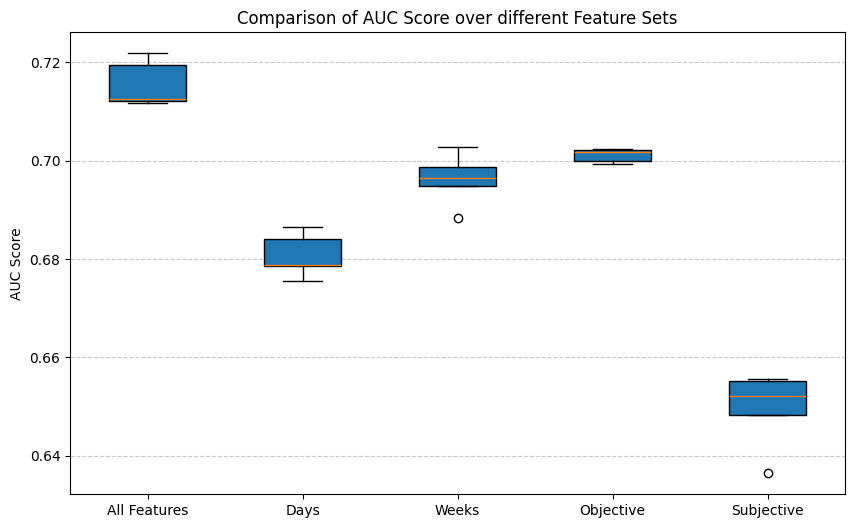

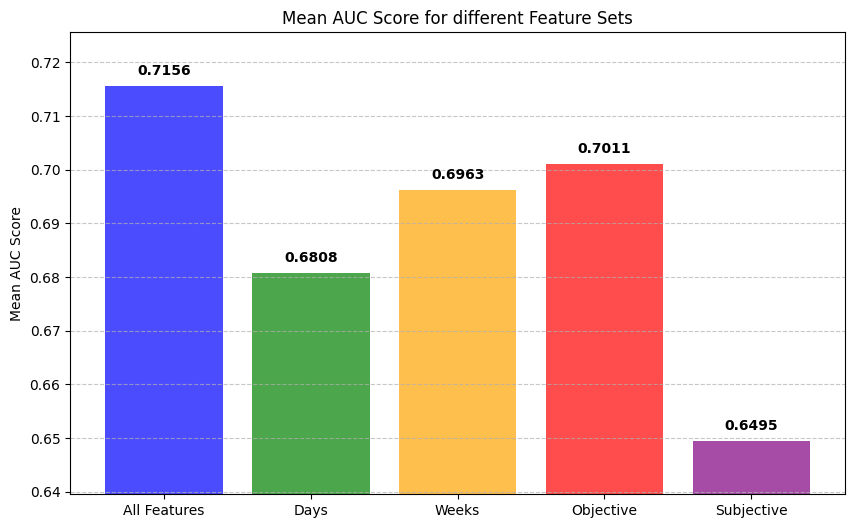

<ipython-input-9-6839d4efd28e>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(metric_data, labels=feature_set_names, patch_artist=True)


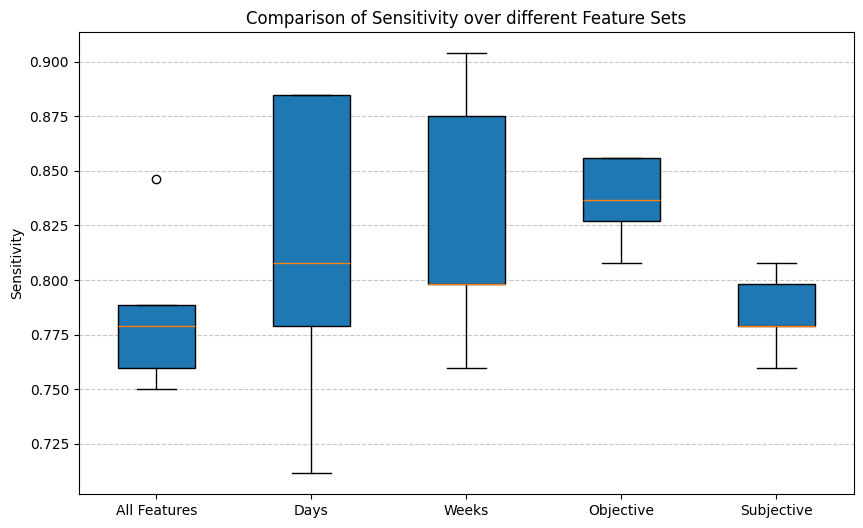

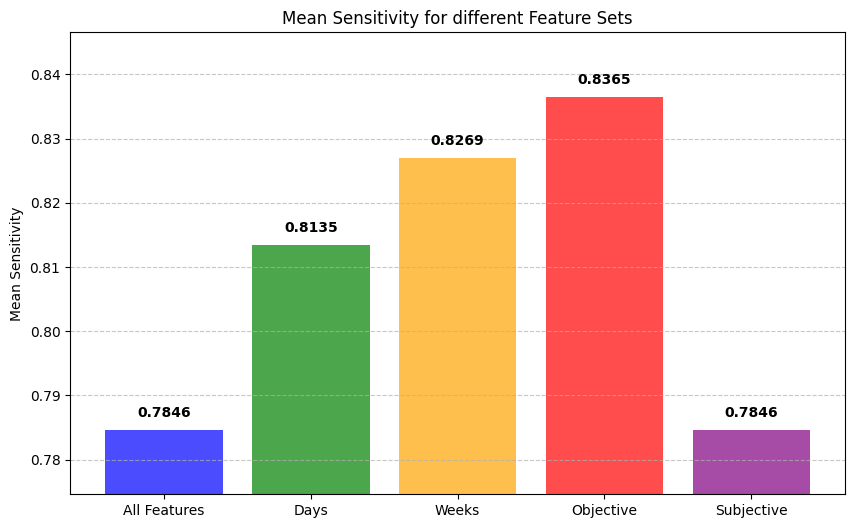

<ipython-input-9-6839d4efd28e>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(metric_data, labels=feature_set_names, patch_artist=True)


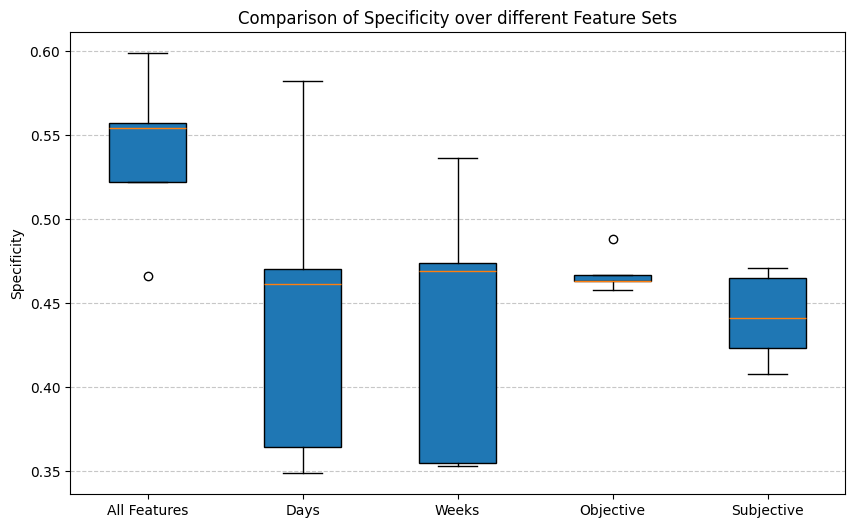

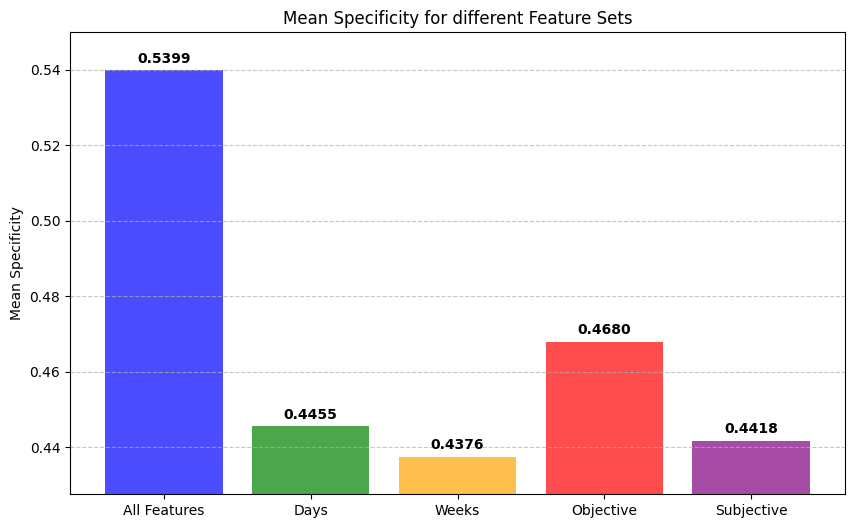

<ipython-input-9-6839d4efd28e>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(metric_data, labels=feature_set_names, patch_artist=True)


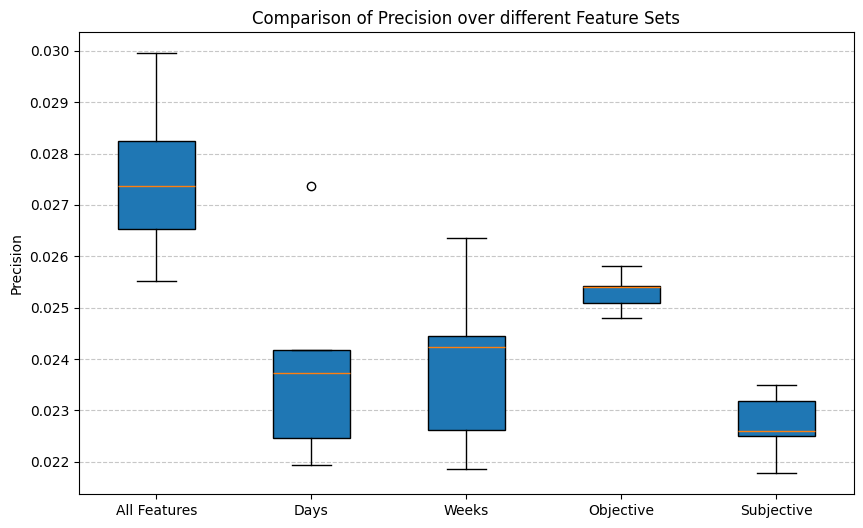

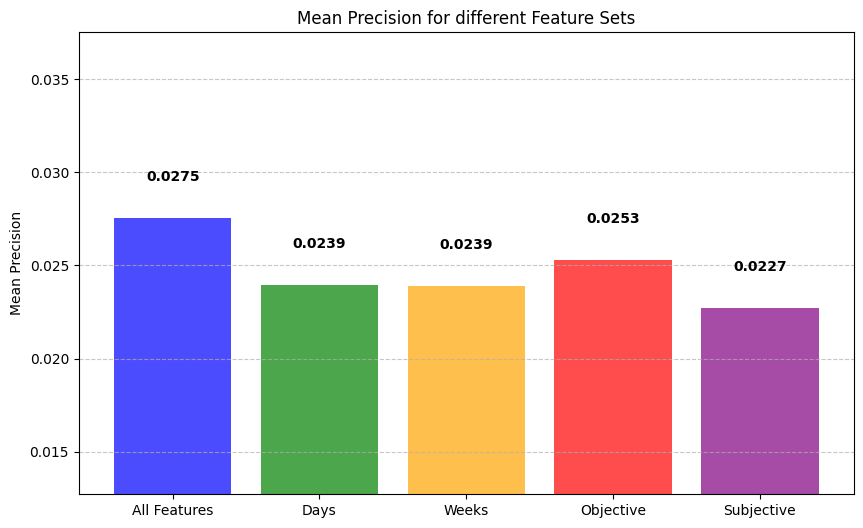

<ipython-input-9-6839d4efd28e>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(metric_data, labels=feature_set_names, patch_artist=True)


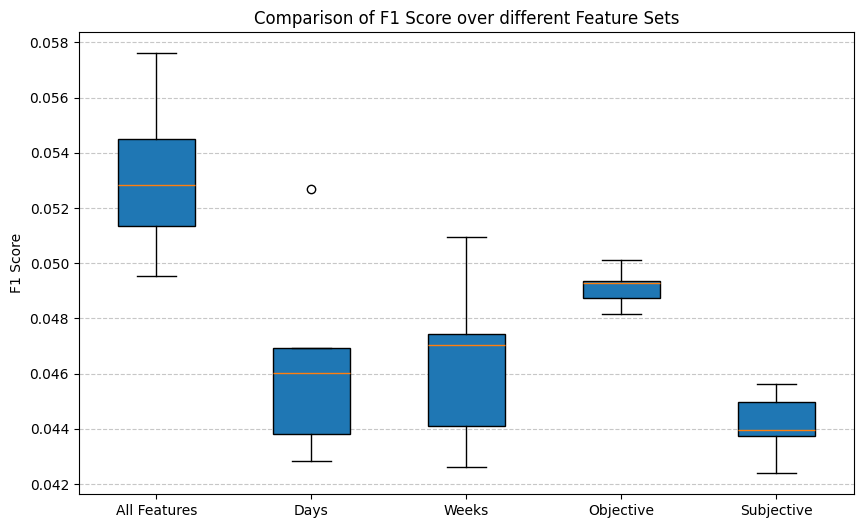

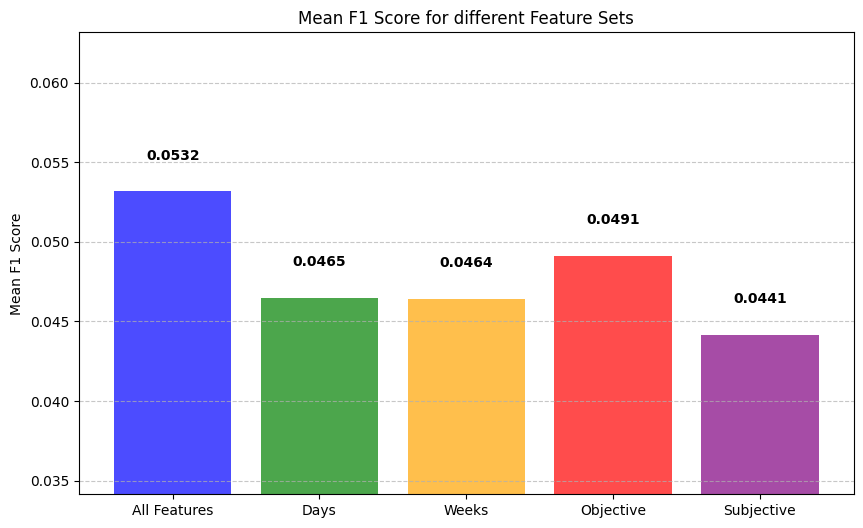

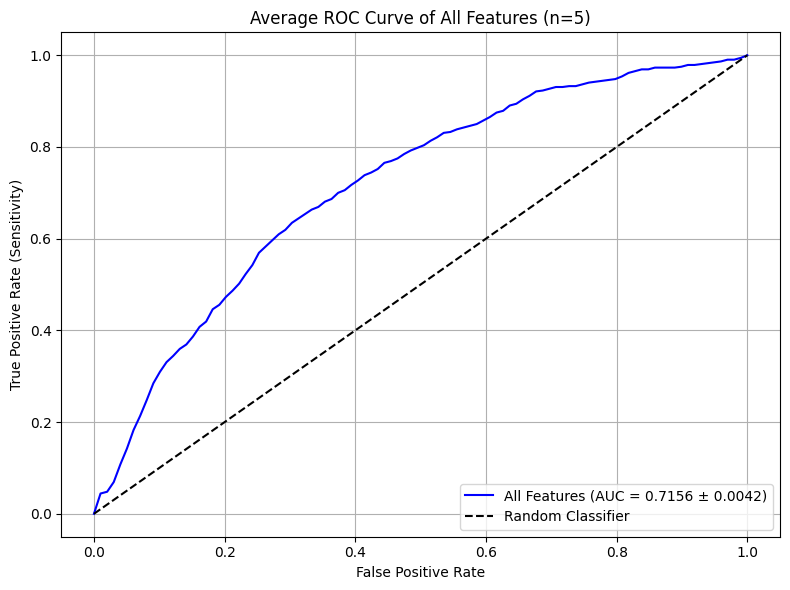

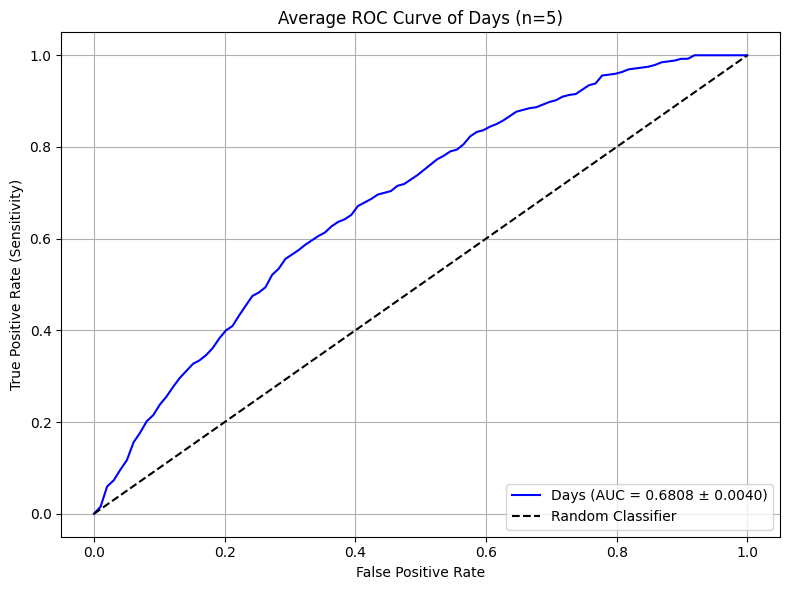

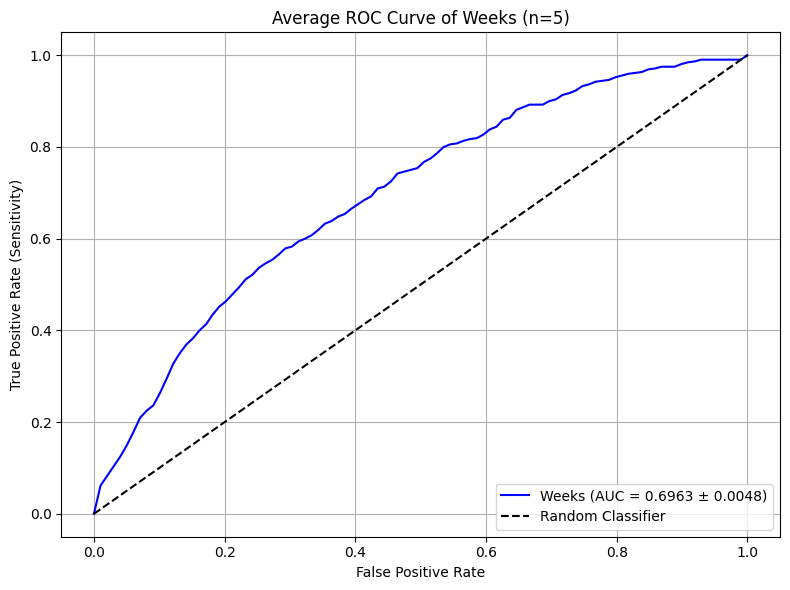

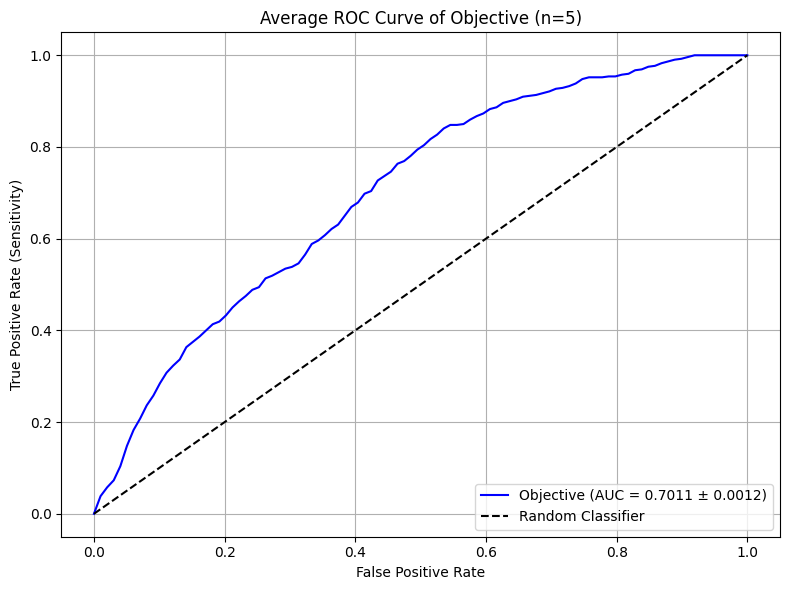

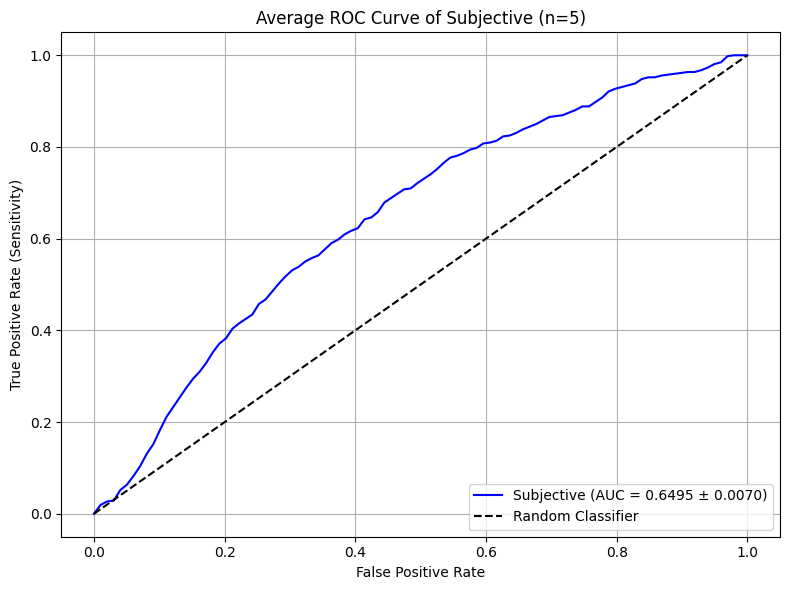

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

feature_set_names = ["All Features", "Days", "Weeks", "Objective", "Subjective"]

# Get all metrics
metrics = {
    "AUC Score": [all_auc_scores, auc_scores_days, auc_scores_weeks, auc_scores_objective, auc_scores_subjective],
    "Sensitivity": [all_sensitivity, sensitivity_days, sensitivity_weeks, sensitivity_objective, sensitivity_subjective],
    "Specificity": [all_specificity, specificity_days, specificity_weeks, specificity_objective, specificity_subjective],
    "Precision": [all_precision, precision_days, precision_weeks, precision_objective, precision_subjective],
    "F1 Score": [all_f1, f1_days, f1_weeks, f1_objective, f1_subjective],
}

# Plots
for metric_name, metric_data in metrics.items():
    plt.figure(figsize=(10, 6))
    plt.boxplot(metric_data, labels=feature_set_names, patch_artist=True)
    plt.ylabel(metric_name)
    plt.title(f"Comparison of {metric_name} over different Feature Sets")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    mean_values = {name: np.mean(values) for name, values in zip(feature_set_names, metric_data)}

    plt.figure(figsize=(10, 6))
    plt.bar(mean_values.keys(), mean_values.values(),
            color=["blue", "green", "orange", "red", "purple"], alpha=0.7)
    plt.ylabel(f"Mean {metric_name}")
    plt.title(f"Mean {metric_name} for different Feature Sets")
    plt.ylim(min(mean_values.values()) - 0.01, max(mean_values.values()) + 0.01)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    for i, v in enumerate(mean_values.values()):
        plt.text(i, v + 0.002, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")

    plt.show()

# Average ROC Curves over 5 rounds
from sklearn.metrics import roc_curve, auc

roc_data = {
    "All Features": (all_y_true, all_y_pred),
    "Days": (y_true_days, y_pred_days),
    "Weeks": (y_true_weeks, y_pred_weeks),
    "Objective": (y_true_objective, y_pred_objective),
    "Subjective": (y_true_subjective, y_pred_subjective),
}

for name, (all_true, all_pred) in roc_data.items():
    tpr_list = []
    auc_list = []
    mean_fpr = np.linspace(0, 1, 100)

    for y_true, y_score in zip(all_true, all_pred):
        fpr, tpr, _ = roc_curve(y_true, y_score)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tpr_list.append(interp_tpr)
        auc_list.append(auc(fpr, tpr))

    mean_tpr = np.mean(tpr_list, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='blue', label=f"{name} (AUC = {mean_auc:.4f} ± {std_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.title(f"Average ROC Curve of {name} (n={amount_of_trainings})")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# Single model export (only all features since it has the best probabilities overall)
joblib.dump(cb_models, 'cb_models.pkl')

In [ ]:
# Model export for Ensemble prediction later
import joblib

joblib.dump(cb_models, 'cb_models.pkl')
joblib.dump(cb_models_days, 'cb_models_days.pkl')
joblib.dump(cb_models_weeks, 'cb_models_weeks.pkl')
joblib.dump(cb_models_objective, 'cb_models_objective.pkl')
joblib.dump(cb_models_subjective, 'cb_models_subjective.pkl')

['cb_models_subjective.pkl']